## Project: Employee Promotion Prediction

### GUMED

#### Description
#### Background & Context

Employee Promotion means the ascension of an employee to higher ranks, this aspect of the job is what drives employees the most.
The ultimate reward for dedication and loyalty towards an organization and HR team plays an important role in handling all these promotion tasks based on ratings and other attributes available.

The HR team in JMD company stored data of promotion cycle last year, which consists of details of all the employees in the company working last year and also
if they got promoted or not, but every time this process gets delayed due to so many details available for each employee - it gets difficult to compare and decide.

So this time HR team wants to utilize the stored data to make a model, that will predict if a person is eligible for promotion or not.

You as a data scientist at JMD company, need to come up with a model that will help the HR team to predict if a person is eligible for promotion or not.

#### Objective

Explore and visualize the dataset.
Build a classification model to predict if the customer has a higher probability of getting a promotion.
Optimize the model using appropriate techniques.
Generate a set of insights and recommendations that will help the company.
Data Dictionary:

employee_id: Unique ID for employee

department: Department of employee

region: Region of employment (unordered)

education: Education Level

gender: Gender of Employee

recruitment_channel: Channel of recruitment for employee

no_ of_ trainings: no of other trainings completed in previous year on soft skills, technical skills etc.

age: Age of Employee

previous_ year_ rating: Employee Rating for the previous year

length_ of_ service: Length of service in years

awards_ won: if awards won during previous year then 1 else 0

avg_ training_ score: Average score in current training evaluations

is_promoted: (Target) Recommended for promotion

#### Employee Promotion Prediction
1. Perform an Exploratory Data Analysis on the data - Univariate analysis - Bivariate analysis - Use appropriate visualizations to identify the patterns and insights - Any other exploratory deep dive 
2. Illustrate the insights based on EDA - Key meaningful observations on the relationship between variables 
3. Data Pre-processing - Prepare the data for analysis - Missing value Treatment, Outlier Detection(treat, if needed- why or why not ), Feature Engineering, Prepare data for modeling 
4. Model building - Logistic Regression - Make a logistic regression model - Improve model performance by up and downsampling the data - Regularize above models, if required 
5. Model building - Bagging and Boosting - Build Decision tree, random forest, bagging classifier models - Build Xgboost, AdaBoost, and gradient boosting models 
6. Hyperparameter tuning using grid search - Tune the best 3 models using grid search and provide the reason behind choosing those models - Use pipelines in hyperparameter tuning 
7. Hyperparameter tuning using random search - Tune the best 3 models using random search and provide the reason behind choosing those models - Use pipelines in hyperparameter tuning 
8. Model Performances - Compare the model performance of all the models - Comment on the time taken by the grid and randomized search in optimization 
9. Actionable Insights & Recommendations - Business recommendations and insights 
10. Notebook - Overall quality - Structure and flow - Well commented code 

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#let us start by importing the relevant libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn import metrics

from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline, make_pipeline

#libraries to help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier)
from xgboost import XGBClassifier

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [5]:
df = pd.read_csv('employee_promotion.csv')

### Shape of the Dataset

In [5]:
df.shape

(54808, 13)

### Data types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


### Non Unique values

In [7]:
df.nunique()

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        5
length_of_service          35
awards_won                  2
avg_training_score         59
is_promoted                 2
dtype: int64

In [8]:
df.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.000,8,0,49.000,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.000,4,0,60.000,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.000,7,0,50.000,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.000,10,0,50.000,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.000,2,0,73.000,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.000,7,0,85.000,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.000,5,0,59.000,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.000,6,0,63.000,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.000,5,0,83.000,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.000,5,0,54.000,0


### Empty values

In [9]:
df.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

### Percentage of missing values

In [10]:
pd.DataFrame(
    data={
        "% of Missing Values": round(df.isna().sum() / df.isna().count() * 100, 2)
    }
)

,% of Missing Values
employee_id,0.000
department,0.000
region,0.000
education,4.400
gender,0.000
recruitment_channel,0.000
no_of_trainings,0.000
age,0.000
previous_year_rating,7.520
length_of_service,0.000


In [11]:
df.median()

employee_id            39225.500
no_of_trainings            1.000
age                       33.000
previous_year_rating       3.000
length_of_service          5.000
awards_won                 0.000
avg_training_score        60.000
is_promoted                0.000
dtype: float64

In [12]:
for i in df.describe(include=['object']).columns:
    print('Unique values in',i, 'are :')
    print(df[i].value_counts())
    print('*'*50)

Unique values in department are :
Sales & Marketing    16840
Operations           11348
Procurement           7138
Technology            7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64
**************************************************
Unique values in region are :
region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
reg

The employee_id column does not add any value to our analysis. We can drop that column

There are three columns that have empty values in the. There are 2409 empty values in the education column, 4124 in the previous_year_rating column, and 2560 in the avg_training_score column. 

Instead of removing all the rows from the three columns that have empty values, let's apply knn imputer.
For the 'previous_year_rating' and 'avg_training_score' columns (float, we can replace the nan values with median value.

### Value count for categorical variables

In [13]:
# Categorical variables
categorical_var = [
    "department",
    "education",
    "gender",
    "recruitment_channel",
]

# Printing number of count of each unique value in each column
for column in categorical_var:
    print(df[column].value_counts())
    print("-" * 40)

Sales & Marketing    16840
Operations           11348
Procurement           7138
Technology            7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64
----------------------------------------
Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64
----------------------------------------
m    38496
f    16312
Name: gender, dtype: int64
----------------------------------------
other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64
----------------------------------------


### Summary of data type with Transpose

In [14]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
employee_id,54808.000,39195.831,22586.581,1.000,19669.750,39225.500,58730.500,78298.000
no_of_trainings,54808.000,1.253,0.609,1.000,1.000,1.000,1.000,10.000
age,54808.000,34.804,7.660,20.000,29.000,33.000,39.000,60.000
previous_year_rating,50684.000,3.329,1.260,1.000,3.000,3.000,4.000,5.000
length_of_service,54808.000,5.866,4.265,1.000,3.000,5.000,7.000,37.000
awards_won,54808.000,0.023,0.150,0.000,0.000,0.000,0.000,1.000
avg_training_score,52248.000,63.712,13.522,39.000,51.000,60.000,77.000,99.000
is_promoted,54808.000,0.085,0.279,0.000,0.000,0.000,0.000,1.000


#### Observations:
* Employee_ID: It is a unique identifier for customers and can be dropped
* Age: Age of employees ranges from 20 to 60 years.The average age of customers is 35 years.
* Num of Trainings: On average the employees have 1.25 trainings, with a maximum of 10 trainings.
* Average Training Score: On average the Training score is 64. With a Maximum of 99.
* Length of Service: On average the employees have been serving for 6 years, with a Maximum of 37 years of service.

## Univariate Analysis

In [15]:
def histo_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,color = 'orange') if bins else sns.distplot(feature, kde=False, ax=ax_hist2,color='tab:cyan') # For histogram
    ax_hist2.axvline(np.mean(feature), color='purple', linestyle='--') # Add mean
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median

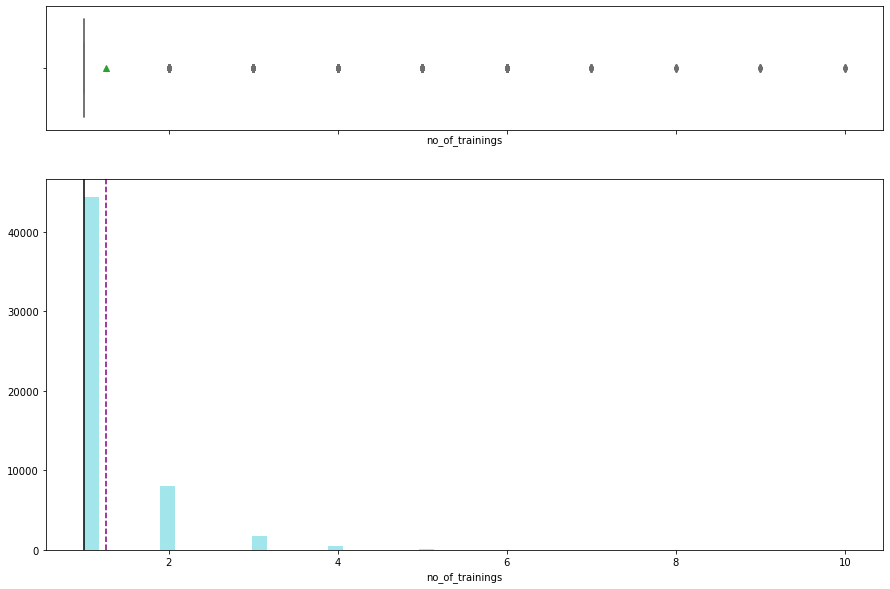

In [16]:
histo_boxplot(df["no_of_trainings"])

- The majority of employees only have 1 training on record.

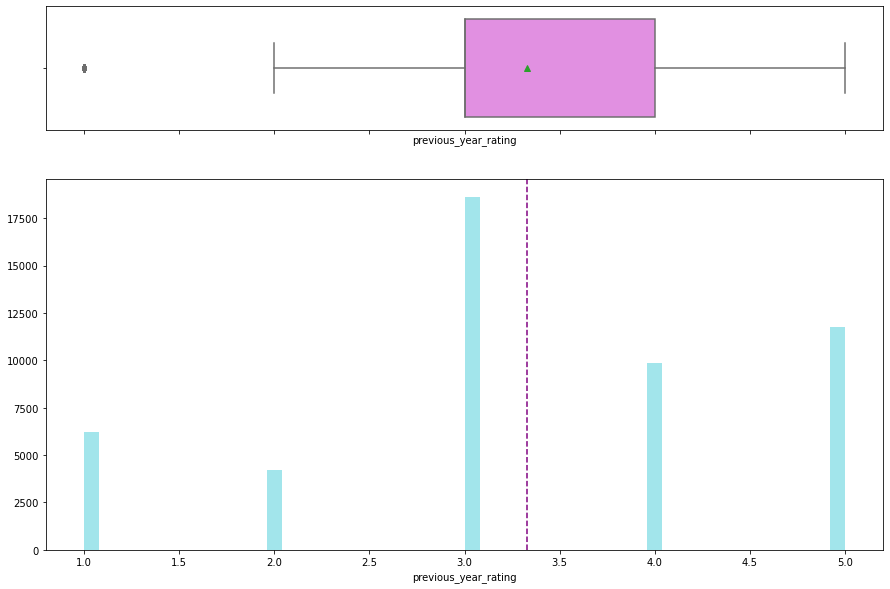

In [17]:
histo_boxplot(df["previous_year_rating"])

- The majority of scores are 3, with a mean score of 3.3.

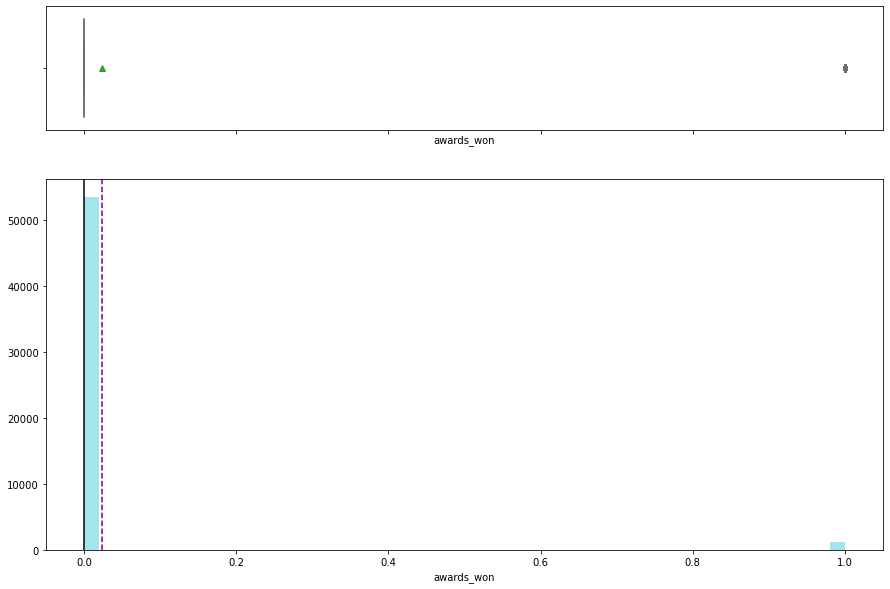

In [18]:
histo_boxplot(df["awards_won"])

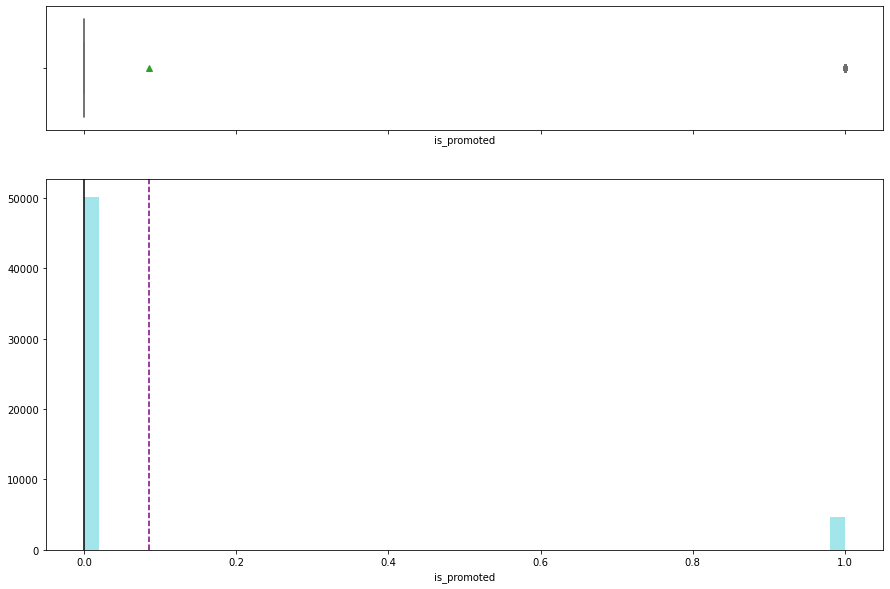

In [19]:
histo_boxplot(df["is_promoted"])

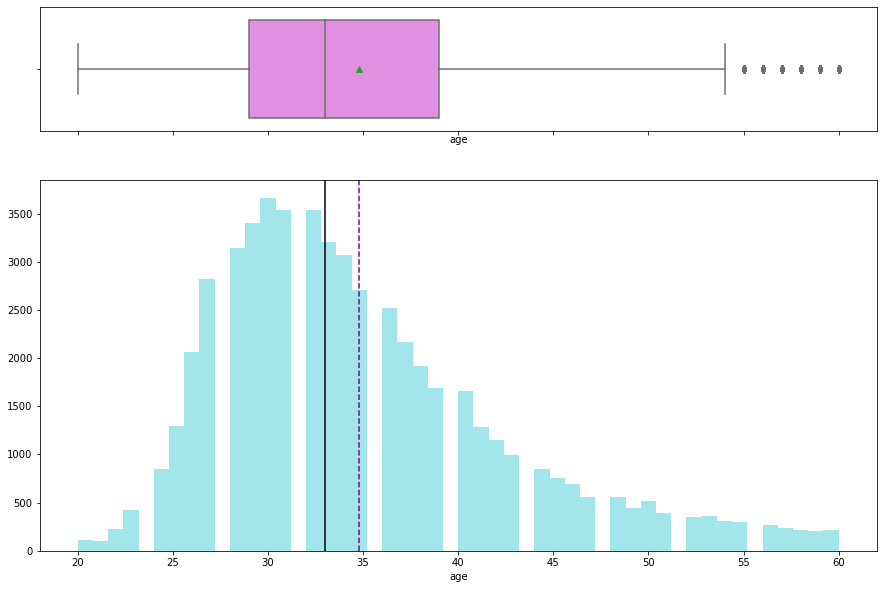

In [20]:
histo_boxplot(df["age"])

In [21]:
def perc_on_bar(z):
    
    total = len(df[z]) # length of the column
    plt.figure(fiOgsize=(15,5))
    ax = sns.countplot(df[z],palette='Paired')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

### Observations on Department Education Gender Recruitment Channel

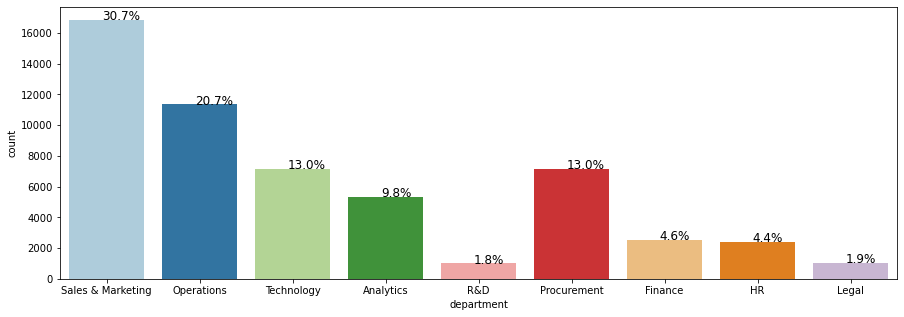

In [22]:
perc_on_bar('department')

- The largest group of employees is in the Sales and Marketing department, followed by Operations and then the Technology department.

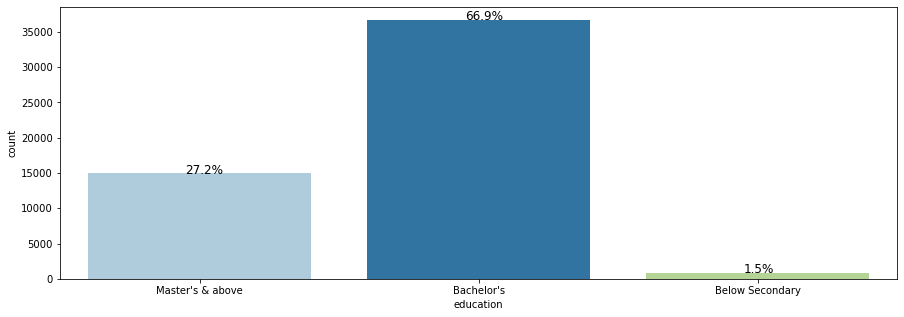

In [23]:
perc_on_bar('education')

- The highest percentage of employees (67%) posses a Bachelor's degree. The second group is Master's or above with 27%.

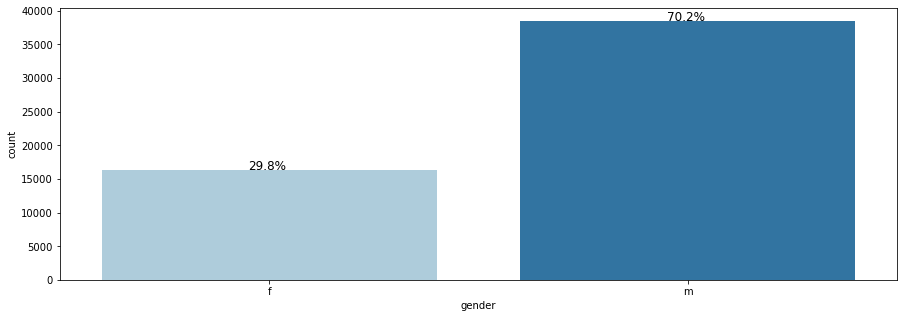

In [24]:
perc_on_bar('gender')

- 71% of employees are male. 29% are female.

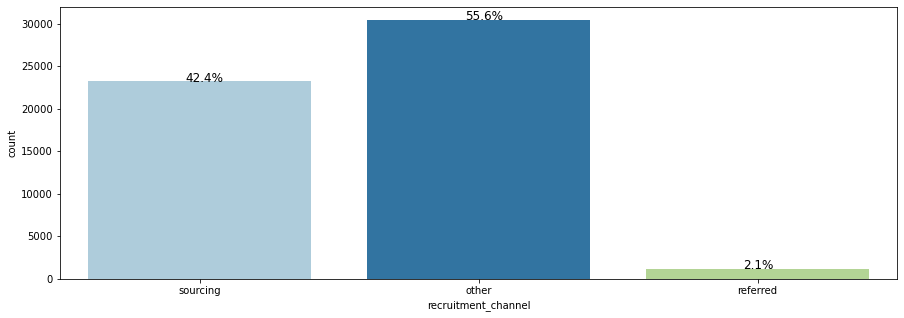

In [25]:
perc_on_bar('recruitment_channel')

- 55 % of the employees where contacted by an unidentified recruitment channel.

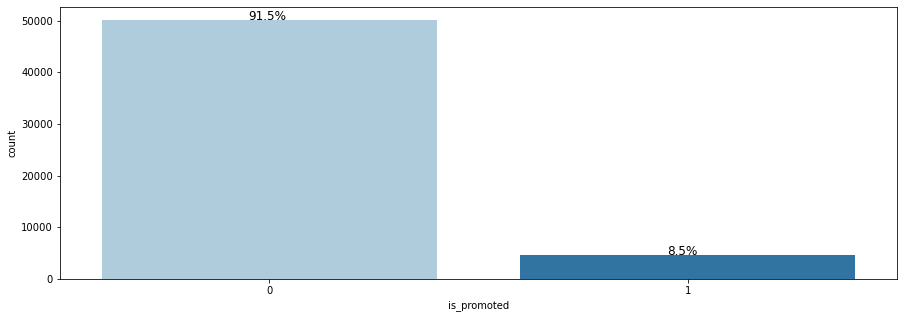

In [26]:
perc_on_bar('is_promoted')

- 8.5% of employees have been promoted.

## Bivariate Analysis

In [27]:
df['is_promoted'].replace('Promoted',0,inplace=True)
df['is_promoted'].replace('Not Promoted',1,inplace=True)

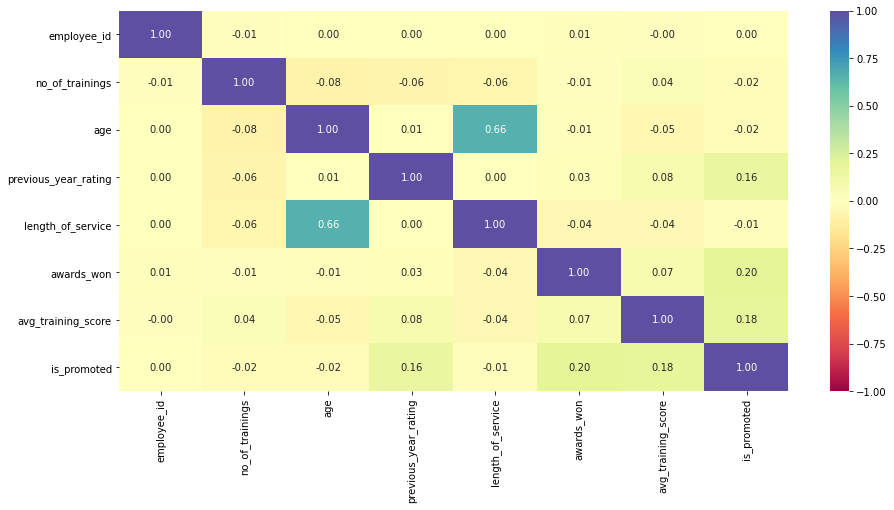

In [28]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap='Spectral')
plt.show()

There is a positive correlation between Age and Length of service. That would be an expected result in our data because of the relation between Age of employee and time working.

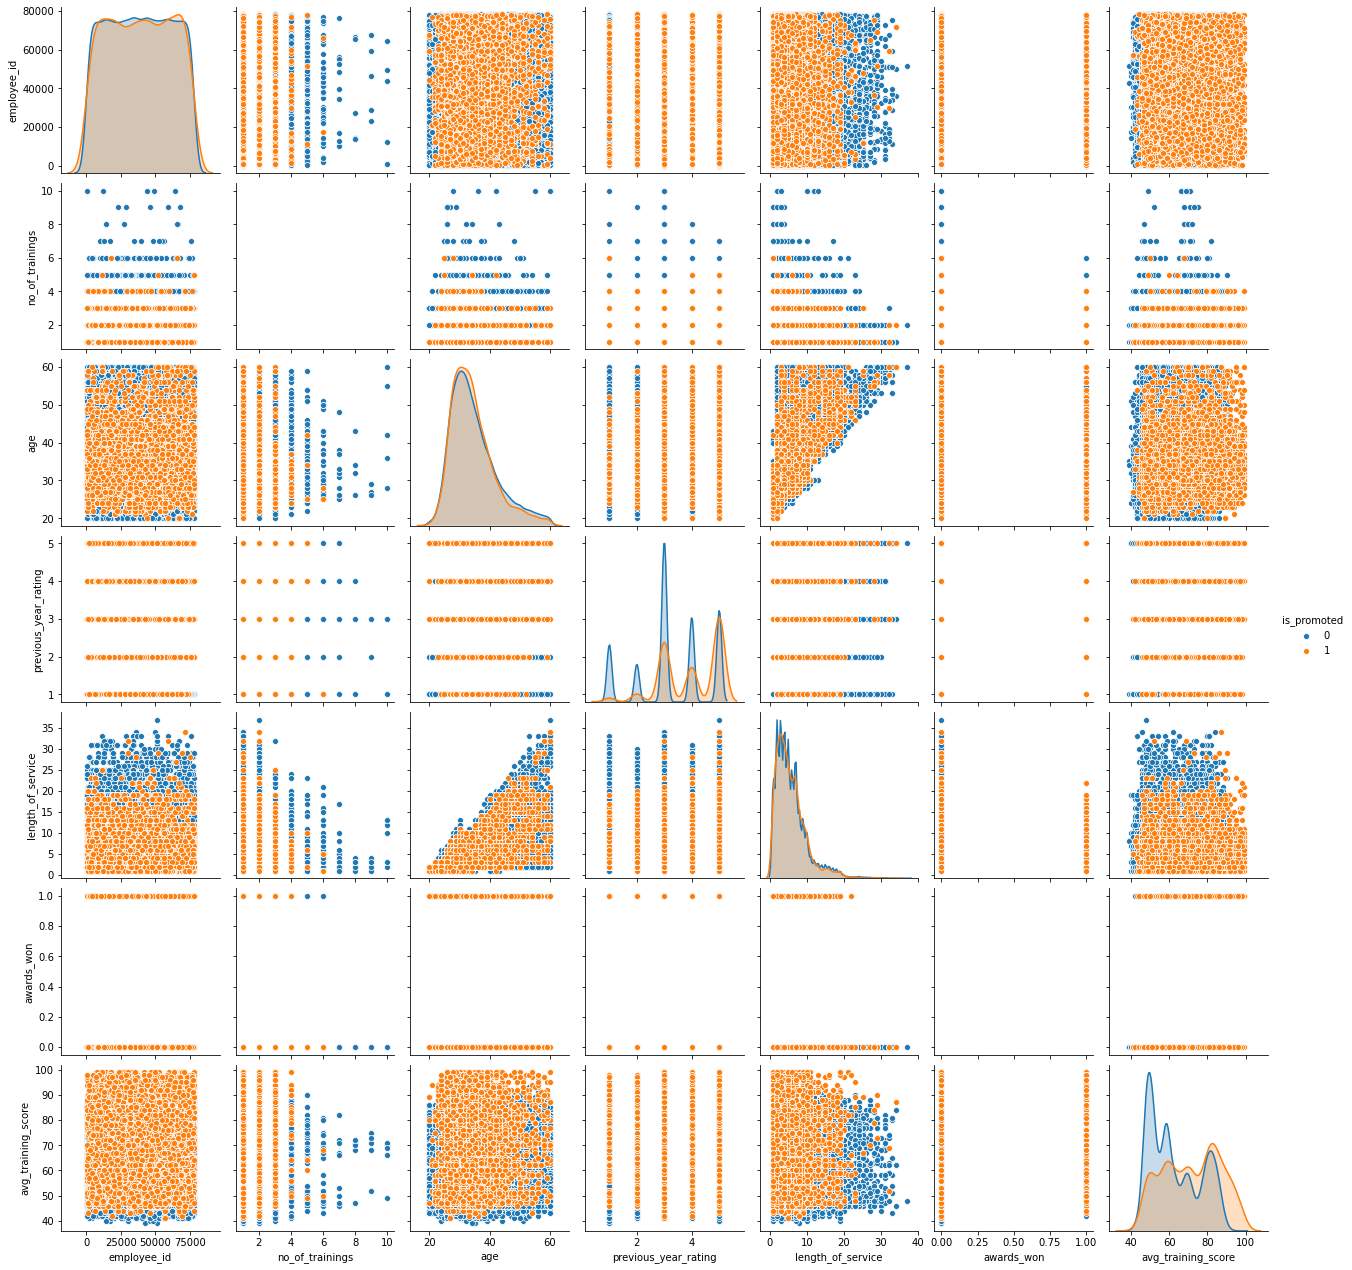

In [29]:
sns.pairplot(df , hue='is_promoted' , diag_kind = 'kde')
plt.show()

- There is a right skewness at age and length of service.
- There is a positive correlation between age and length of service.
- There are multiple variations in the rating scores from the previous year, with a higher percentage of employees having an intermediate score.

### The company needs to reduce False Negatives to be able to identify more candidates for promotion. We need to increase the Recall Score. 

In [30]:
def stack_plt(x):
    sns.set(palette="nipy_spectral")
    
    tab1 = pd.crosstab(x,df['is_promoted'],margins=True).sort_values(by=1,ascending=False)
    print(tab1)
    print('-'*120)
    
    tab = pd.crosstab(x,df['is_promoted'],normalize='index').sort_values(by=1,ascending=False)
    tab.plot(kind='bar',stacked=True,figsize=(17,7))
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

### Is promoted vs Age

is_promoted      0     1    All
age                            
All          50140  4668  54808
30            3341   324   3665
33            2891   319   3210
31            3224   310   3534
28            2839   308   3147
32            3237   297   3534
29            3111   294   3405
34            2790   286   3076
35            2428   283   2711
27            2566   261   2827
36            2309   208   2517
38            1739   184   1923
37            1981   184   2165
26            1897   163   2060
39            1534   161   1695
40            1536   127   1663
41            1185   104   1289
42            1058    91   1149
43             915    77    992
24             775    70    845
44             777    70    847
25            1230    69   1299
45             712    48    760
48             513    44    557
46             654    43    697
23             394    34    428
51             355    34    389
49             408    33    441
50             490    31    521
52      

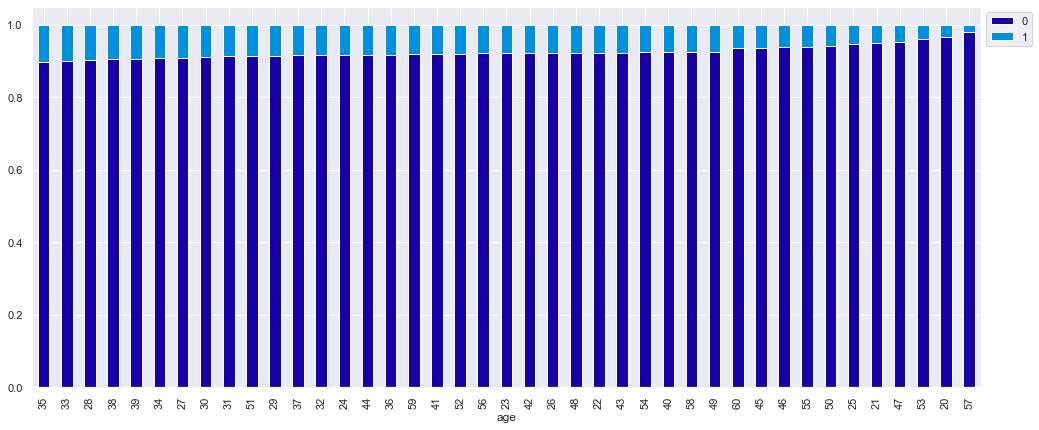

In [31]:
stack_plt(df['age'])

- There are more employees in their thirties,and before the knn imputer, sampling and running the models the data showed that employees in the group of 30 years and 20 years of age have a higher percentage of being promoted. 
- After applying EDA, Feature Selection, Imputing, Upsampling and Undersampling the data shows that individuals in the groups of 50 and 30 years of age have a higher percentage of employee promotion.

### Is promoted vs Previous Year Rating

is_promoted               0     1    All
previous_year_rating                    
All                   46355  4329  50684
5.0                    9820  1921  11741
3.0                   17263  1355  18618
4.0                    9093   784   9877
2.0                    4044   181   4225
1.0                    6135    88   6223
------------------------------------------------------------------------------------------------------------------------


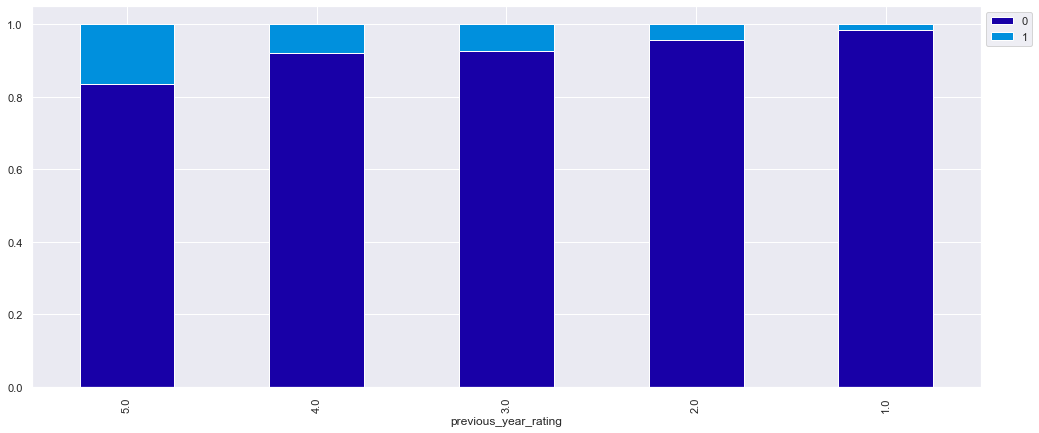

In [32]:
stack_plt(df['previous_year_rating'])

- Employees with higher scores from last year on the scale from 1 to 5, have a higher chance of getting a promotion.

### Is promoted vs Department

is_promoted            0     1    All
department                           
All                50140  4668  54808
Sales & Marketing  15627  1213  16840
Operations         10325  1023  11348
Technology          6370   768   7138
Procurement         6450   688   7138
Analytics           4840   512   5352
Finance             2330   206   2536
HR                  2282   136   2418
R&D                  930    69    999
Legal                986    53   1039
------------------------------------------------------------------------------------------------------------------------


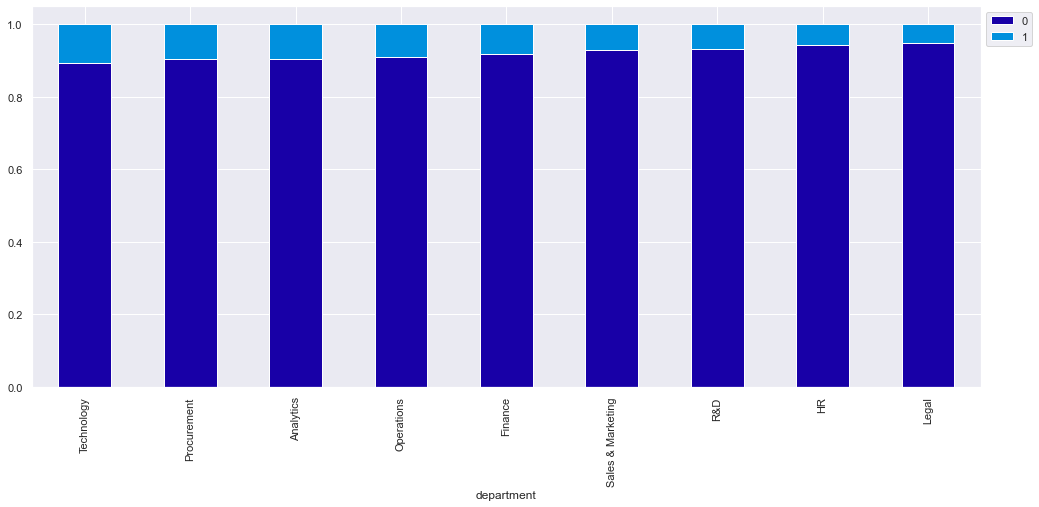

In [33]:
stack_plt(df['department'])

- From the graph (Is promoted vs Department) we can see that employees from the Technology and Procurement departments are more likely to be promoted.
- After running the models the top two are the Technology and Analytics departments.

- The Technlogy department is a field identified with higher chance of getting promoted. This is based on a comparisson of the percentage of employees promoted in each department. Higher promotion percentage in the Technology department is probably due to the employees having to update their skills and education more constantly to keep up with rapid changes in the Tech industry.

### Is promoted vs Education

is_promoted           0     1    All
education                           
All               47853  4546  52399
Bachelor's        33661  3008  36669
Master's & above  13454  1471  14925
Below Secondary     738    67    805
------------------------------------------------------------------------------------------------------------------------


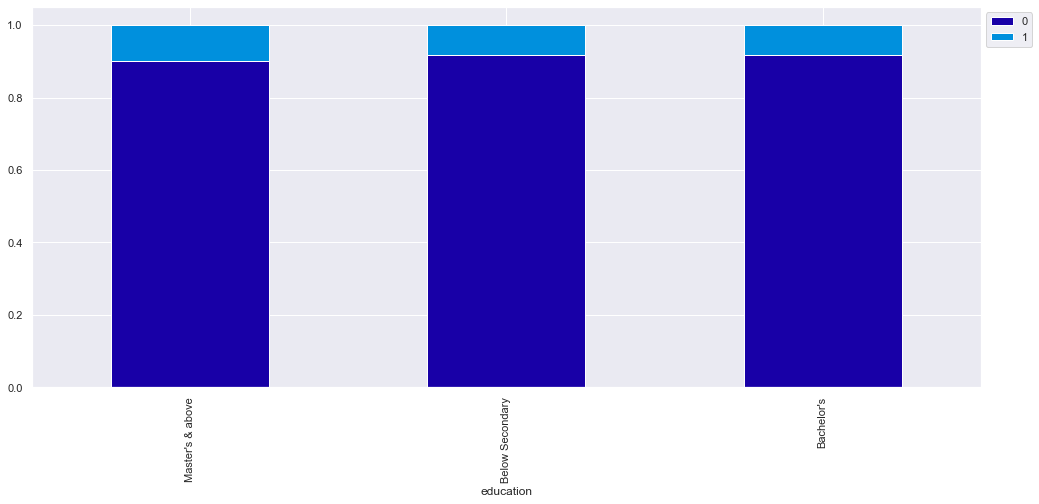

In [34]:
stack_plt(df['education'])

- From the graph (Is Promoted vs Education), we can see that employees with a Master's degree & above are more likely to be promoted.

### Is promoted vs Gender

is_promoted      0     1    All
gender                         
All          50140  4668  54808
m            35295  3201  38496
f            14845  1467  16312
------------------------------------------------------------------------------------------------------------------------


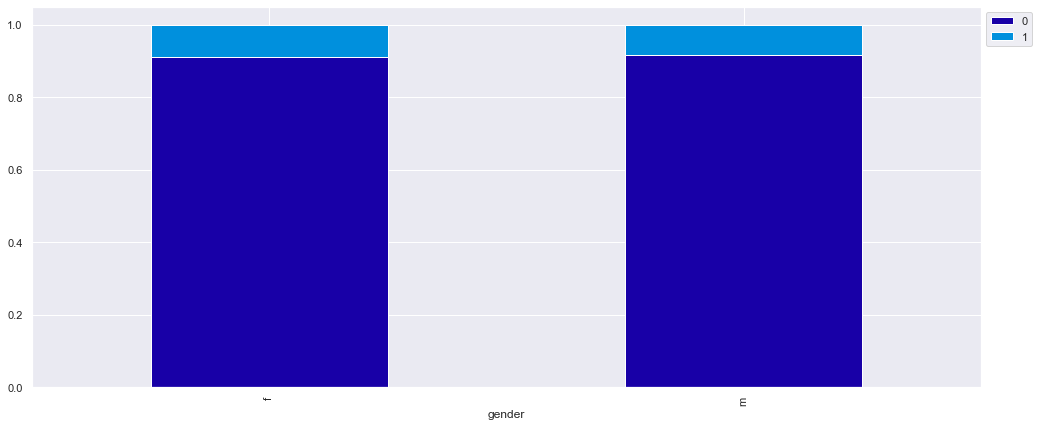

In [35]:
stack_plt(df['gender'])

The graph (Is Promoted vs Gender) indicates that within each gender, there is a slighly higher percentage of females that are promoted.

### Is promoted vs Recruitment Channel

is_promoted              0     1    All
recruitment_channel                    
All                  50140  4668  54808
other                27890  2556  30446
sourcing             21246  1974  23220
referred              1004   138   1142
------------------------------------------------------------------------------------------------------------------------


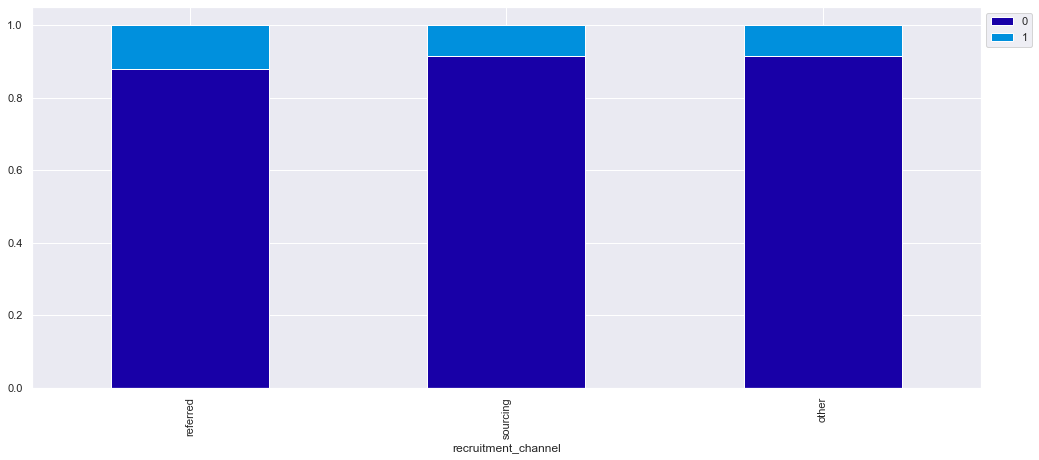

In [36]:
stack_plt(df['recruitment_channel'])

The graph (Is promoted vs Recruitment channel) shows that the employees that are referred are more likely to be promoted.

### Is promoted vs Number of Trainings

is_promoted          0     1    All
no_of_trainings                    
All              50140  4668  54808
1                40468  3910  44378
2                 7382   605   7987
3                 1654   122   1776
4                  442    26    468
5                  125     3    128
6                   42     2     44
7                   12     0     12
8                    5     0      5
9                    5     0      5
10                   5     0      5
------------------------------------------------------------------------------------------------------------------------


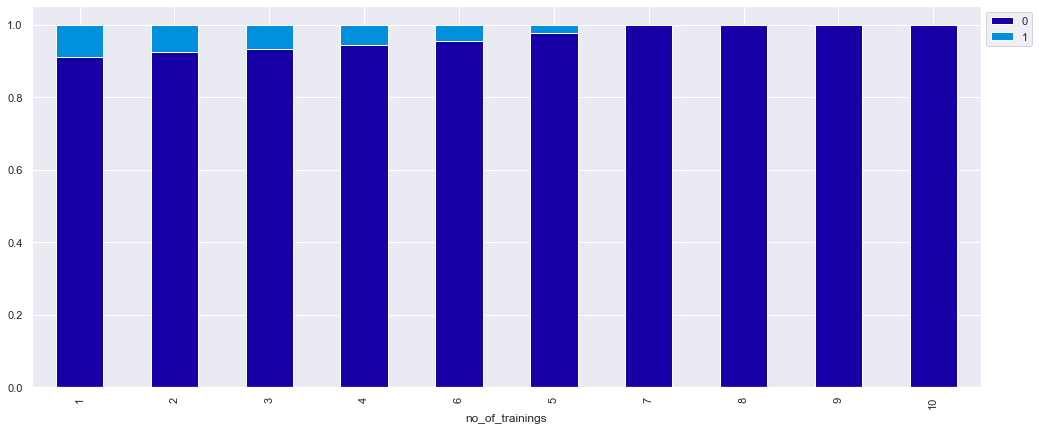

In [37]:
stack_plt(df['no_of_trainings'])

### Is promoted vs Awards won

is_promoted      0     1    All
awards_won                     
All          50140  4668  54808
0            49429  4109  53538
1              711   559   1270
------------------------------------------------------------------------------------------------------------------------


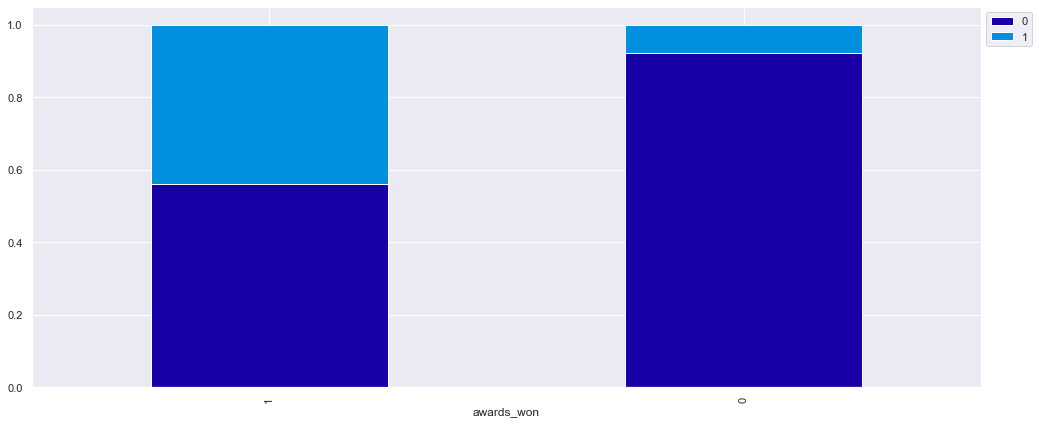

In [38]:
stack_plt(df['awards_won'])

From the graph above we can deduct that receiving more trainings does not necessarly garantee a promotion. In fact employees with less amount of training are showing higher percentages of promotion.

### Is promoted vs Length of Service

is_promoted            0     1    All
length_of_service                    
All                50140  4668  54808
3                   6424   609   7033
4                   6238   598   6836
2                   6089   595   6684
5                   5357   475   5832
7                   5087   464   5551
6                   4333   401   4734
1                   4170   377   4547
8                   2614   269   2883
9                   2400   229   2629
10                  1989   204   2193
11                   820    96    916
12                   731    63    794
13                   633    54    687
15                   550    43    593
16                   507    41    548
19                   297    32    329
14                   520    29    549
17                   406    26    432
18                   367    25    392
20                   118    10    128
23                    58     7     65
22                    55     6     61
21                    74     4     78
29          

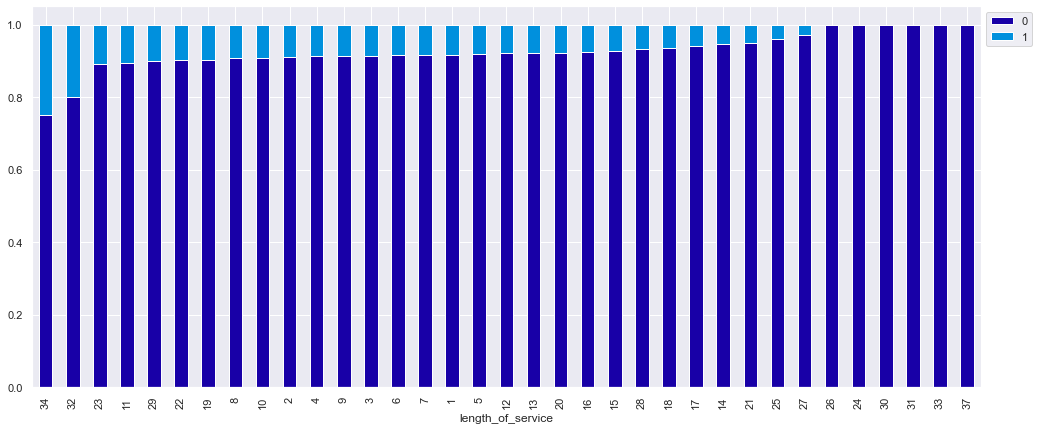

In [39]:
stack_plt(df['length_of_service'])

In [40]:
def plot(x,target='is_promoted'):
    fig,axs = plt.subplots(2,2,figsize=(12,10))
    axs[0, 0].set_title('Distribution of an Promoted Employees')
    sns.distplot(df[(df[target] == 1)][x],ax=axs[0,0],color='teal')
    axs[0, 1].set_title('Distribution of Non Promoted ')
    sns.distplot(df[(df[target] == 0)][x],ax=axs[0,1],color='orange')
    axs[1,0].set_title('Boxplot for Employees Promoted')
    sns.boxplot(df[target],df[x],ax=axs[1,0],palette='gist_rainbow')
    axs[1,1].set_title('Boxplot for Employees Promoted - Without outliers')
    sns.boxplot(df[target],df[x],ax=axs[1,1],showfliers=False,palette='gist_rainbow')
    plt.tight_layout()
    plt.show()

### Is Promoted vs. Previous Year Rating

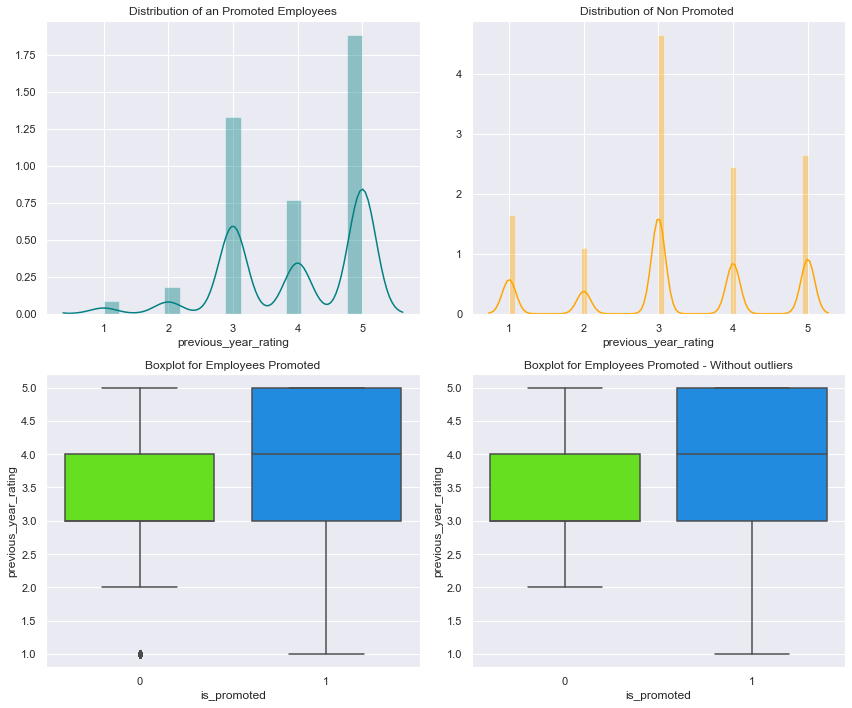

In [41]:
plot('previous_year_rating')

- There is a difference between the employees  with higher previous year ratings and promotions. Employees with higher scores were promoted more often.

### Is Promoted vs. Number of Trainings

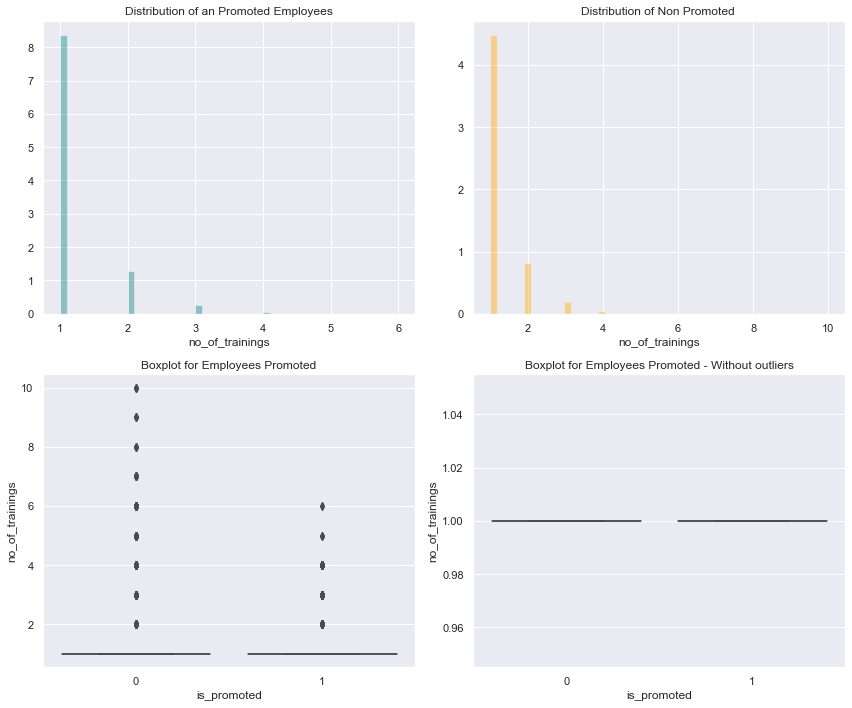

In [42]:
plot('no_of_trainings')

- There were many outliers in the 'Number of Trainings' dimension.

### Is Promoted vs. Age

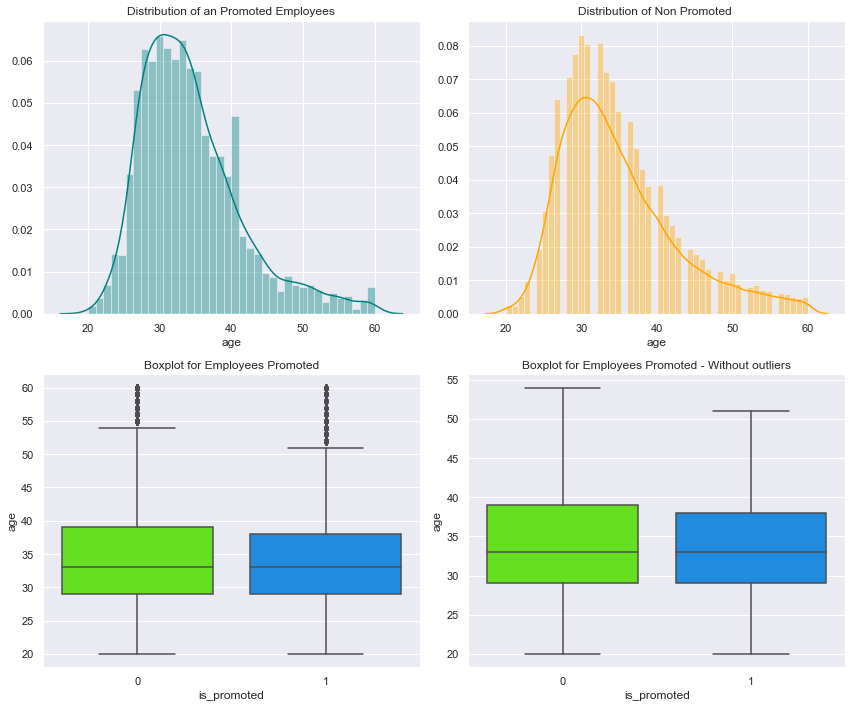

In [43]:
plot('age')

### Is Promoted vs. Length of Service

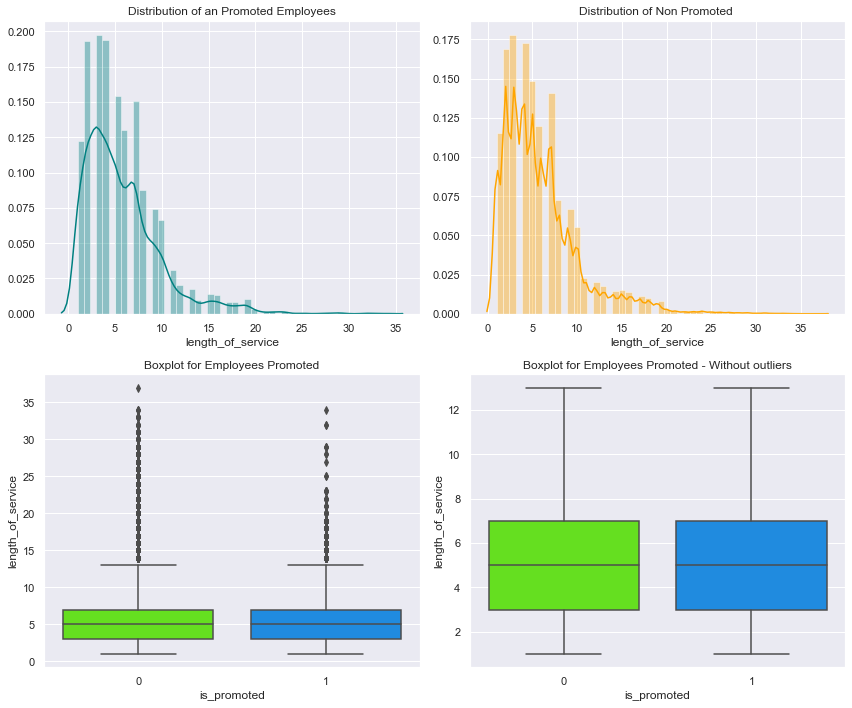

In [44]:
plot('length_of_service')

### Is Promoted vs. Awards won

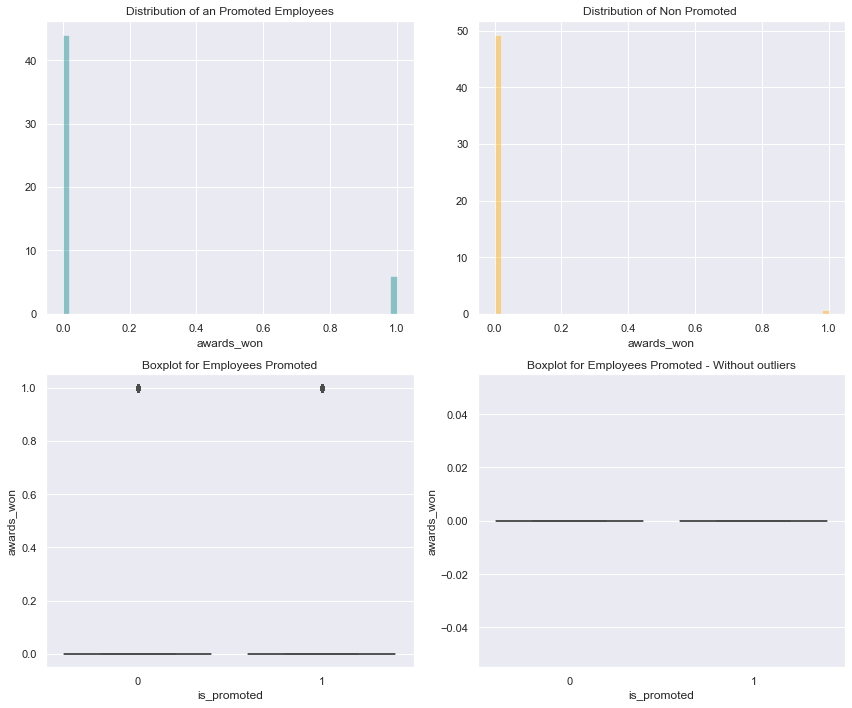

In [45]:
plot('awards_won')

### Percentage of Outliers

In [46]:
#25th percentile
Quant1 = df.quantile(0.25)             
#75th percentile
Quant3 = df.quantile(0.75)

IQR = Quant3 - Quant1                           

lower=Quant1-1.5*IQR                        
upper=Quant3+1.5*IQR

In [47]:
((df.select_dtypes(include=['float64','int64'])<lower) | (df.select_dtypes(include=['float64','int64'])>upper)).sum()/len(df)*100

employee_id             0.000
no_of_trainings        19.030
age                     2.618
previous_year_rating   11.354
length_of_service       6.366
awards_won              2.317
avg_training_score      0.000
is_promoted             8.517
dtype: float64

- The highest percentage of outliers is in the 'Number of Trainings' received by employees. This would be a hard metric to measure. The HR department could identify specific trainings or training areas that could help with identifying if a candidate is ready for a promotion.
- The following dimensions with most outliers are previous year rating and length of service.
- We are not going to remove these outliers as there are some that can provide good real data (trainings, ratings, and length of service) and we would want our model to learn with the most real data any underlying patterns.

## Preparation of the Data

- The employee id field has all unique values. This does not add any value to our models, so we can drop this dimension.

In [6]:
df = df.drop('employee_id', axis=1)

In [7]:
df1 = df.copy()

- Rename the education values to remove apostrophes and empty spaces

In [8]:
df1["education"].replace({"Bachelor's":"Bachelors", 
                          "Below Secundary":"Below_Secundary", "Master's & above":"Masters_and_above"}, inplace=True)

In [9]:
region = {"region_1": 1, "region_2": 2, "region_3": 3, "region_4": 4, "region_5": 5, "region_6": 6, "region_7": 7, "region_8": 8, "region_9": 9, "region_10": 10, "region_11": 11, "region_12": 12, "region_13": 13, "region_14": 14, "region_15": 15, "region_16": 16, "region_17": 17, "region_18": 18, "region_19": 19, "region_20": 20, "region_21": 21, "region_22": 22, "region_23": 23, "region_24": 24, "region_25": 25, "region_26": 26, "region_27": 27, "region_28": 28, "region_29": 29, "region_30": 30, "region_31": 31, "region_32": 32, "region_33": 33, "region_34": 34}
df1['region'] = df1['region'].map(region).astype('Int32')

In [10]:
df1.isnull().sum()

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

### Convert objects to integers

In [11]:
department= {'Sales & Marketing':1, 'Operations':2,'Procurement':3,'Technology':4, 'Analytics':5,'Finance':6,'HR':7,'Legal':8, 'R&D':9}  
df1['department'] = df1['department'].map(department).astype('Int32')

education= {"Below_Secundary":1, "Bachelors":2,"Masters_and_above":3}  
df1["education"] = df1["education"].map(education).astype('Int32')

gender = {'m':0,'f':1}
df1['gender'] = df1['gender'].map(gender).astype('Int32')

recruitment_channel = {'other':0,'sourcing':1,'referred':2} 
df1['recruitment_channel'] = df1['recruitment_channel'].map(recruitment_channel).astype('Int32')


In [12]:
df1.head(10)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,1,7,3,1,1,1,35,5.000,8,0,49.000,0
1,2,22,2,0,0,1,30,5.000,4,0,60.000,0
2,1,19,2,0,1,1,34,3.000,7,0,50.000,0
3,1,23,2,0,0,2,39,1.000,10,0,50.000,0
4,4,26,2,0,0,1,45,3.000,2,0,73.000,0
5,5,2,2,0,1,2,31,3.000,7,0,85.000,0
6,2,20,2,1,0,1,31,3.000,5,0,59.000,0
7,2,34,3,0,1,1,33,3.000,6,0,63.000,0
8,5,20,2,0,0,1,28,4.000,5,0,83.000,0
9,1,1,3,0,1,1,32,5.000,5,0,54.000,0


### Missing value treatment - KNN Imputer 

In [13]:
imputer = KNNImputer(n_neighbors=5)

In [14]:
X = df1.drop(['is_promoted'],axis=1)
y = df1['is_promoted']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7,stratify=y)
print(X_train.shape, X_test.shape)

(38365, 11) (16443, 11)


In [16]:
req_for_impute = ["previous_year_rating", "avg_training_score"]

In [18]:
X_train=pd.DataFrame(imputer.fit_transform(X_train),columns=X_train.columns)

X_test=pd.DataFrame(imputer.transform(X_test),columns=X_test.columns)

In [19]:
# KNNInputer replaces the missing values
X_train[req_for_impute] = np.round(X_train[req_for_impute])
X_test[req_for_impute] = np.round(X_test[req_for_impute])

In [62]:
print(X_train.isna().sum())
print('-'*30)
print(X_test.isna().sum())

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
dtype: int64
------------------------------
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
dtype: int64


- All missing values have been treated

### Function to Inverse the encoding

In [20]:
def inverse_mapping(x,y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype('category')
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype('category')

In [21]:
inverse_mapping(department,'department')
inverse_mapping(gender,'region')
inverse_mapping(education,'education')
inverse_mapping(gender,'gender')
inverse_mapping(recruitment_channel,'recruitment_channel')

In [22]:
cols = X_train.select_dtypes(include=['object','category'])
for i in cols.columns:
    print(X_train[i].value_counts())
    print('*'*30)

Sales & Marketing    11752
Operations            7979
Procurement           4996
Technology            4970
Analytics             3767
Finance               1813
HR                    1684
Legal                  706
R&D                    698
Name: department, dtype: int64
******************************
f    427
Name: region, dtype: int64
******************************
Bachelors            27781
Masters_and_above    10584
Name: education, dtype: int64
******************************
m    26906
f    11459
Name: gender, dtype: int64
******************************
other       21371
sourcing    16181
referred      813
Name: recruitment_channel, dtype: int64
******************************


### Encoding categoricals

In [23]:
X_train=pd.get_dummies(X_train,drop_first=True)
X_test=pd.get_dummies(X_test,drop_first=True)
print(X_train.shape, X_test.shape)

(38365, 18) (16443, 18)


## Building the model

In [24]:
def get_metrics_score(model,train,test,train_y,test_y,flag=True):
    
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = model.score(train,train_y)
    test_acc = model.score(test,test_y)
    
    train_recall = metrics.recall_score(train_y,pred_train)
    test_recall = metrics.recall_score(test_y,pred_test)
    
    train_precision = metrics.precision_score(train_y,pred_train)
    test_precision = metrics.precision_score(test_y,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True print the following statements
    if flag == True: 
        print("Accuracy on training set : ",model.score(train,train_y))
        print("Accuracy on test set : ",model.score(test,test_y))
        print("Recall on training set : ",metrics.recall_score(train_y,pred_train))
        print("Recall on test set : ",metrics.recall_score(test_y,pred_test))
        print("Precision on training set : ",metrics.precision_score(train_y,pred_train))
        print("Precision on test set : ",metrics.precision_score(test_y,pred_test))
    
    return score_list # return the list with train and test scores

In [25]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Performance on Test Set

* Let's try oversampling to see if the traning data can be increased and the model performance can be improved.

### SMOTE to upsample the data

In [26]:
from imblearn.over_sampling import SMOTE

In [27]:
print("Before UpSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_up, y_train_up = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label '1': {}".format(sum(y_train_up==1)))
print("After UpSampling, counts of label '0': {} \n".format(sum(y_train_up==0)))



print('After UpSampling, the shape of train_X: {}'.format(X_train_up.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_up.shape))

Before UpSampling, counts of label '1': 3268
Before UpSampling, counts of label '0': 35097 

After UpSampling, counts of label '1': 35097
After UpSampling, counts of label '0': 35097 

After UpSampling, the shape of train_X: (70194, 18)
After UpSampling, the shape of train_y: (70194,) 



* Let's try undersampling to see if the traning data can be increased and the model performance can be improved.

### SMOTE for undersampling train data

In [28]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [29]:
print("Before Under Sampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before Under Sampling, counts of label '0': {} \n".format(sum(y_train==0)))

print("After Under Sampling, counts of label '1': {}".format(sum(y_train_un==1)))
print("After Under Sampling, counts of label '0': {} \n".format(sum(y_train_un==0)))

print('After Under Sampling, the shape of train_X: {}'.format(X_train_un.shape))
print('After Under Sampling, the shape of train_y: {} \n'.format(y_train_un.shape))

Before Under Sampling, counts of label '1': 3268
Before Under Sampling, counts of label '0': 35097 

After Under Sampling, counts of label '1': 3268
After Under Sampling, counts of label '0': 3268 

After Under Sampling, the shape of train_X: (6536, 18)
After Under Sampling, the shape of train_y: (6536,) 



## Logistic Regression 

In [30]:
log_reg_up = LogisticRegression(random_state = 1)

log_reg_up.fit(X_train_up,y_train_up)

LogisticRegression(random_state=1)

In [31]:
logreg = LogisticRegression(random_state=1)
logreg.fit(X_train,y_train)

LogisticRegression(random_state=1)

Accuracy on training set :  0.527751659686013
Accuracy on test set :  0.9219120598430943
Recall on training set :  0.055788244009459496
Recall on test set :  0.08785714285714286
Precision on training set :  0.9949186991869918
Precision on test set :  0.9461538461538461


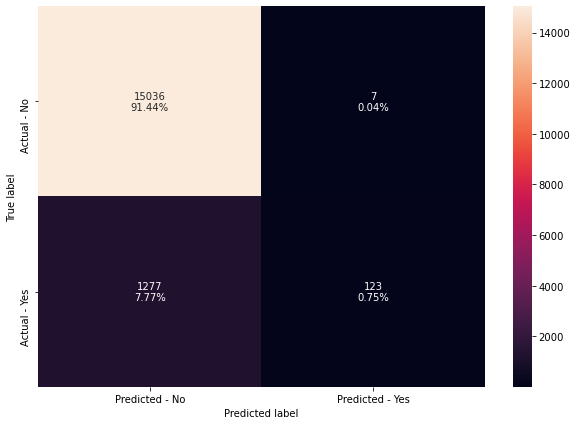

In [32]:
# Different metrics
get_metrics_score(logreg,X_train_up,X_test,y_train_up,y_test)

# Confusion matrix
make_confusion_matrix(logreg,y_test)

## Cross Validation

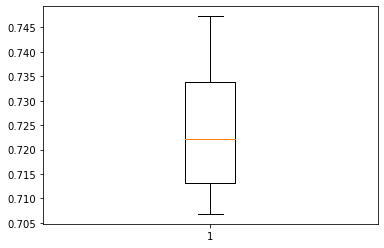

In [33]:
scoring='recall'
kfold=StratifiedKFold(n_splits=10,shuffle=True,random_state=1)    
crossver_result_res=cross_val_score(estimator=log_reg_up, X=X_train_up, y=y_train_up, scoring=scoring, cv=kfold)

plt.boxplot(crossver_result_res)
plt.show()

* The Performance of model on training set is between 77.8 to 78.6%, a big improvement after sampling.
- Cross validation is providing a much better Recall Score

### Performance on the test set

Accuracy on training set :  0.7456192836994615
Accuracy on test set :  0.7484035759897829
Recall on training set :  0.7193207396643588
Recall on test set :  0.4742857142857143
Precision on training set :  0.7592553607410304
Precision on test set :  0.16334563345633457


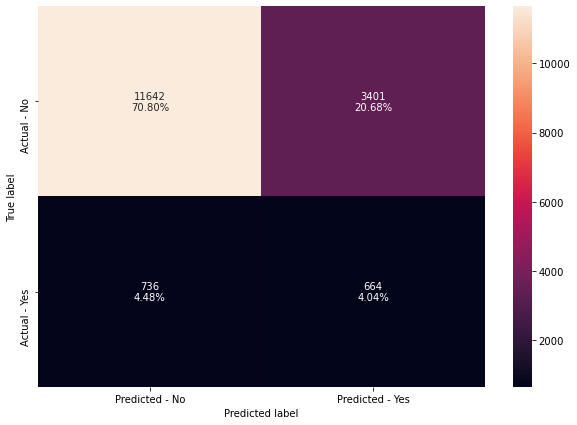

In [34]:
# Metrics
get_metrics_score(log_reg_up,X_train_up,X_test,y_train_up,y_test)

# Confusion matrix
make_confusion_matrix(log_reg_up,y_test)

The performance on the Model has improved after upsampling

* With Logistic Regression we have Accuracy and precision on the test data, but very low Recall score.

Now let's try Regularization

### Regularization

In [35]:
logreg_estimator = LogisticRegression(random_state=1,solver='saga') # Choose classifier. 

parameters = {'C': np.arange(0.1,1.1,0.1)} # Grid of parameters

# Grid search
grid_obj = GridSearchCV(logreg_estimator, parameters, scoring='recall')
grid_obj = grid_obj.fit(X_train_up, y_train_up)

logreg_estimator = grid_obj.best_estimator_ # CLF for best combination of parameters

logreg_estimator.fit(X_train_up, y_train_up)

LogisticRegression(C=0.1, random_state=1, solver='saga')

Accuracy on training set :  0.7495939823916574
Accuracy on test set :  0.7450586875874232
Recall on training set :  0.7308032025529247
Recall on test set :  0.4764285714285714
Precision on training set :  0.7593403990763219
Precision on test set :  0.16165777993213767


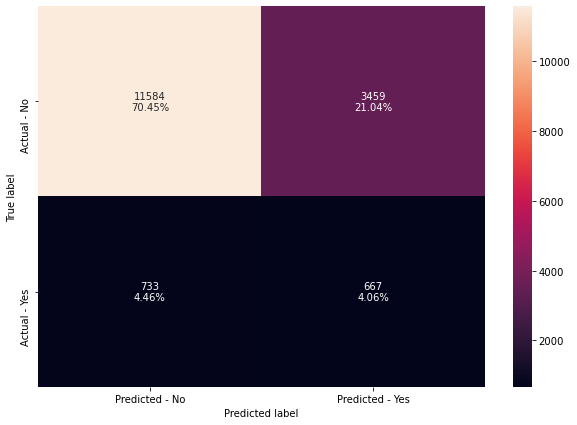

In [40]:
# Metrics
get_metrics_score(logreg_estimator,X_train_up,X_test,y_train_up,y_test)

# Confusion matrix
make_confusion_matrix(logreg_estimator,y_test)

Regulatization increased the recall test value to 48%.

### Logistic Regression for undersampled data

In [37]:
log_reg_under = LogisticRegression(random_state = 1)
log_reg_under.fit(X_train_un,y_train_un )

LogisticRegression(random_state=1)

### Kfold and cross-validator to evaluate model performance

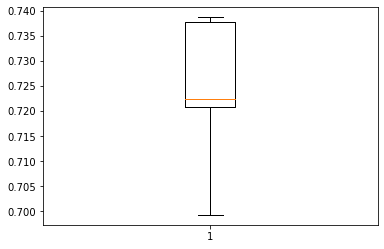

In [39]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     
crossver_result_under=cross_val_score(estimator=log_reg_under, X=X_train_up, y=y_train_up, scoring=scoring, cv=kfold)

plt.boxplot(crossver_result_under)
plt.show()

- The performance on the traning set data with after regularization, kfold and cross validation ranges from 70% to close to 74%, with Q1 at 72% and Q3 at 73.7% and a mean 72.3%. 
- There was a slight improvement after regularizing the data.

Accuracy on training set :  0.6785495716034272
Accuracy on test set :  0.6996898376208721
Recall on training set :  0.666156670746634
Recall on test set :  0.6714285714285714
Precision on training set :  0.6830875431440226
Precision on test set :  0.17349575489110372


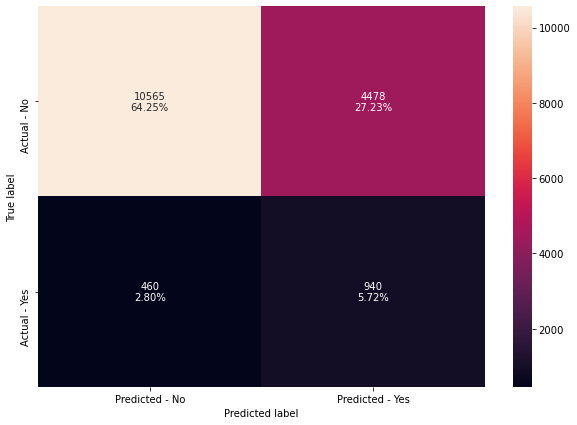

In [41]:
# Metrics
get_metrics_score(log_reg_under,X_train_un,X_test,y_train_un,y_test)

# creating confusion matrix
make_confusion_matrix(log_reg_under,y_test)

* Downsampling provided a higher recall score in comparison to the score before sampling.
* Performance has improved with downsampling but it is not better than when upsampling the data.
* The model has a generalized performance on both the training set and test set.

### The Recall score decreased with undersampling in comparison to upsampling. 
### When undersampling a lot of data is lost, so the recommendation is to use the over sample model.

### Building the Model

In [42]:
models = [] 

models.append(
    (
        "DecisionTree",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("decision_tree", DecisionTreeClassifier(random_state=1,)),
            ]
        ),
    )
)


models.append(
    (
        "Bagging",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", BaggingClassifier(random_state=1)),
            ]
        ),
    )
)


models.append(
    (
        "RandomForest",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", RandomForestClassifier(random_state=1)),
            ]
        ),
    )
)

models.append(
    (
        "AdaBoost",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("adaboost", AdaBoostClassifier(random_state=1)),
            ]
        ),
    )
)


models.append(
    (
        "GradientBoost",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("gradient_boosting", GradientBoostingClassifier(random_state=1)),
            ]
        ),
    )
)


models.append(
    (
        "XGradientBoost",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("xgboost", XGBClassifier(random_state=1,eval_metric='logloss')),
            ]
        ),
    )
)

results = []  
names = []  

# loop through all models
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  
    crossver_result = cross_val_score(
        estimator=model, X=X_train_up, y=y_train_up, scoring=scoring, cv=kfold
    )
    results.append(crossver_result)
    names.append(name)
    print("{}: {}".format(name, crossver_result.mean() * 100))

DecisionTree: 92.84554012734665
Bagging: 92.70877946672218
RandomForest: 93.68036371769097
AdaBoost: 80.84453106322317
GradientBoost: 82.26914654525427
XGradientBoost: 92.62616203718925


### The highest scores are from Random Forest, Bagging Classifier, Decision Tree and XGBoost

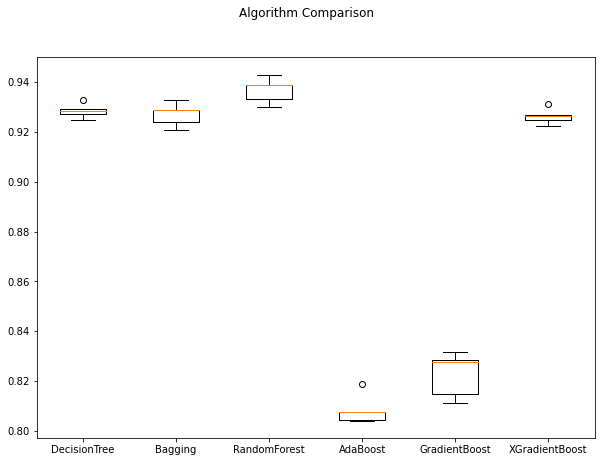

In [43]:
# Boxplots for Cross V scores
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

- Random Forest is giving the highest cross validated recall score. RF and Bagging is consistent. 
- RF is followed by Bagging Classifier, Decision Tree and XGBoost.
- The Decision Tree and XGBoost have outliers
- The boxplot shows that the performance of Decision Tree and XGBoost is consistent with 1 outlier.

## Decision Tree with Hyperparameter Tuning

### GridSearch Cross Validation

In [51]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV

param_grid = {'decisiontreeclassifier__criterion': ['gini','entropy'],
              'decisiontreeclassifier__max_depth': np.arange(2,30), 
              'decisiontreeclassifier__min_samples_leaf': [1, 2, 5, 7, 10],
              'decisiontreeclassifier__max_leaf_nodes' : [2, 3, 5, 10,15],
              'decisiontreeclassifier__min_impurity_decrease': [0.0001,0.001,0.01,0.1],
              'decisiontreeclassifier__min_samples_split': [2,4,7,10,15]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train_up, y_train_up)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 2, 'decisiontreeclassifier__max_leaf_nodes': 5, 'decisiontreeclassifier__min_impurity_decrease': 0.0001, 'decisiontreeclassifier__min_samples_leaf': 1, 'decisiontreeclassifier__min_samples_split': 2} 
Score: 0.7531972233282961
Wall time: 3h 37s


In [52]:
# Pipeline
dtree_tuned1 = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(
        max_depth=9,
        max_leaf_nodes=15,
        random_state=1,
        min_impurity_decrease=0.0001,
        min_samples_leaf=1
    ),
)

# Fit the model on training data
dtree_tuned1.fit(X_train_up, y_train_up)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=9, max_leaf_nodes=15,
                                        min_impurity_decrease=0.0001,
                                        random_state=1))])

Accuracy on training set :  0.7878166225033478
Accuracy on test set :  0.8732591376269537
Recall on training set :  0.649257771319486
Recall on test set :  0.31
Precision on training set :  0.8981514327381657
Precision on test set :  0.27963917525773196


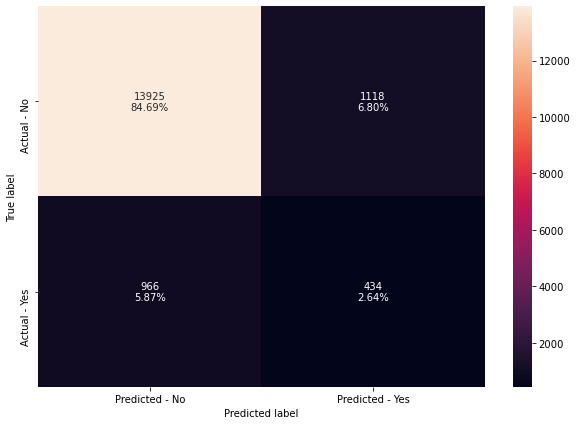

In [53]:
# Metrics
get_metrics_score(dtree_tuned1,X_train_up,X_test,y_train_up,y_test)

# Confusion matrix
make_confusion_matrix(dtree_tuned1, y_test)

- Test Recall has decreased drastically by 15%.
- This model got one of the lowest recall scores.

### Randomized Search Cross Validation

In [54]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1))

# Parameter grid to pass in RandomSearchCV
param_grid = {'decisiontreeclassifier__max_depth': np.arange(2,30), 
              'decisiontreeclassifier__min_samples_leaf': [1, 2, 5, 7, 10],
              'decisiontreeclassifier__max_leaf_nodes' : [2, 3, 5, 10,15],
              'decisiontreeclassifier__min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_jobs = -1, n_iter=100, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_up,y_train_up)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'decisiontreeclassifier__min_samples_leaf': 1, 'decisiontreeclassifier__min_impurity_decrease': 0.01, 'decisiontreeclassifier__max_leaf_nodes': 5, 'decisiontreeclassifier__max_depth': 2} with CV score=0.7531972233282961:
Wall time: 38.2 s


In RandomizedSearchCV the result indicates that the Decision Tree Classifier is how the best parameters are.

In [55]:
# New pipeline with best parameters
dtree_tuned2 = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(
        max_depth=18,
        max_leaf_nodes=15,
        random_state=1,
        criterion='entropy',
        min_impurity_decrease=0.001,
        min_samples_leaf=5
    ),
)

# Fit the model on training data
dtree_tuned2.fit(X_train_up, y_train_up)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=18,
                                        max_leaf_nodes=15,
                                        min_impurity_decrease=0.001,
                                        min_samples_leaf=5, random_state=1))])

Accuracy on training set :  0.7863065219249509
Accuracy on test set :  0.8773946360153256
Recall on training set :  0.6415932985725276
Recall on test set :  0.32071428571428573
Precision on training set :  0.9029231324431614
Precision on test set :  0.2965653896961691


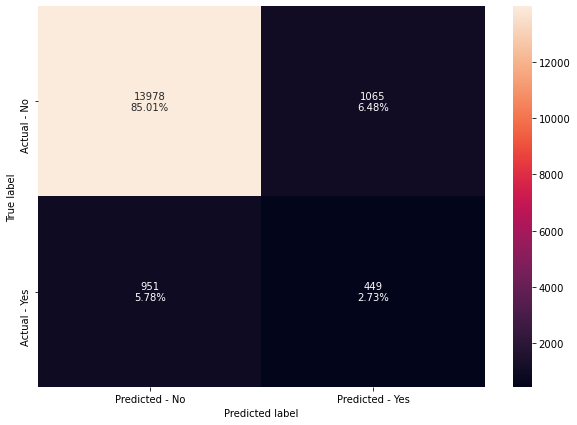

In [56]:
# Different metrics
get_metrics_score(dtree_tuned2,X_train_up,X_test,y_train_up,y_test)

# Confusion matrix
make_confusion_matrix(dtree_tuned2, y_test)

- GridSearchCV took a significant amount of time compared to RandomizedSearchCV.
- The Recall Score and Precision on Test set were better in GridSearchCV.
- Test Recall was at 31% with Grid Search and 32% with Randomized Sarch CV. RandomSearchCV has the best score.
- We see an improvement in both run time and Recall Score, with the Randomized searchCV taking a lot less time as expected.  
- The Randomizes SearchCV is the better DT model.

### Bagging Classifier for Hyperparameter Tuning

### Grid Search Cross Validation

In [72]:
%%time 

# Pipeline
pipe = make_pipeline(StandardScaler(), BaggingClassifier(random_state=1))

# Parameter grid

param_grid = {
              'baggingclassifier__max_samples': [0.7,0.8,0.9,1], 
              'baggingclassifier__max_features': [0.7,0.8,0.9,1],
              'baggingclassifier__n_estimators' : [10,20,30,40,50],
             }


scorer = metrics.make_scorer(metrics.recall_score)

# GridSearch Cross Validation
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters
grid_cv.fit(X_train_up, y_train_up)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'baggingclassifier__max_features': 0.7, 'baggingclassifier__max_samples': 1, 'baggingclassifier__n_estimators': 10} 
Score: 1.0
Wall time: 10min 24s


In [73]:
# New pipeline
bagg_tuned1 = make_pipeline(
    StandardScaler(),
    BaggingClassifier(
        max_features=0.9,
        max_samples=0.8,
        random_state=1,
        n_estimators=20,
    ),
)

# Fit the model
bagg_tuned1.fit(X_train_up, y_train_up)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('baggingclassifier',
                 BaggingClassifier(max_features=0.9, max_samples=0.8,
                                   n_estimators=20, random_state=1))])

Accuracy on training set :  0.9889591702994558
Accuracy on test set :  0.9235540959678891
Recall on training set :  0.9799697979884321
Recall on test set :  0.3028571428571429
Precision on training set :  0.997910984738583
Precision on test set :  0.601418439716312


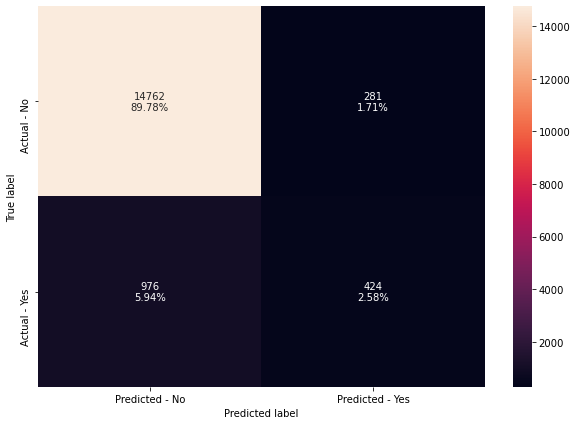

In [74]:
# Metrics
get_metrics_score(bagg_tuned1,X_train_up,X_test,y_train_up,y_test)

# Confusion matrix
make_confusion_matrix(bagg_tuned1, y_test)

- Bagging classifier with Grid search overfitted the data.
- In Recall there is a high difference between the training data and the test data.

#### Randomized Search Cross Validation

In [84]:
%%time

# Pipeline
pipe = make_pipeline(StandardScaler(), BaggingClassifier(random_state=1))

# Parameter grid
param_grid = {
              'baggingclassifier__max_samples': [0.7,0.8,0.9,1], 
              'baggingclassifier__max_features': [0.7,0.8,0.9,1],
              'baggingclassifier__n_estimators' : [10,20,30,40,50],
             }


scorer = metrics.make_scorer(metrics.recall_score)

#Randomized Search Cross Validation
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters
randomized_cv.fit(X_train_up,y_train_up)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'baggingclassifier__n_estimators': 20, 'baggingclassifier__max_samples': 1, 'baggingclassifier__max_features': 0.8} with CV score=1.0:
Wall time: 6min 43s


In [85]:
# New pipeline
bagg_tuned2 = make_pipeline(
    StandardScaler(),
    BaggingClassifier(
        max_features=0.8,
        random_state=1,
        max_samples=1,
        n_estimators=20
    ),
)

# Fit the model
bagg_tuned2.fit(X_train_up, y_train_up)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('baggingclassifier',
                 BaggingClassifier(max_features=0.8, max_samples=1,
                                   n_estimators=20, random_state=1))])

Accuracy on training set :  0.08518180633389809
Accuracy on test set :  0.08514261387824607
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  0.08518180633389809
Precision on test set :  0.08514261387824607


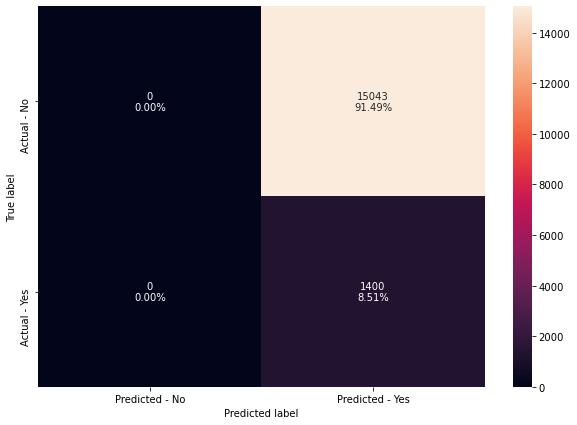

In [86]:
# Metrics
get_metrics_score(bagg_tuned2,X_train,X_test,y_train,y_test)

# Confusion matrix
make_confusion_matrix(bagg_tuned2, y_test)

- The Grid search took twice the amount of time than Random search CV.

- Both have the same Recall Scores and are over fitting the data.

### Random Forest with Hyperparameter Tuning

### Grid Search Cross Validation

In [ ]:
%%time 

# Pipeline
pipe = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1))

# Parameter grid

param_grid = {
    "randomforestclassifier__n_estimators": [100,150,250],
    "randomforestclassifier__min_samples_leaf": np.arange(1, 6),
    "randomforestclassifier__max_features": [np.arange(0.3, 0.6, 0.1),'sqrt','log2'],
    "randomforestclassifier__max_samples": np.arange(0.2, 0.6, 0.1),
}


scorer = metrics.make_scorer(metrics.recall_score)

# GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters
grid_cv.fit(X_train_up, y_train_up)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

The Random Forest with Grid Search failed to fit the model

In [58]:
# Creating new pipeline with best parameters
rf_tuned1 = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(
        n_estimators=25,
        max_features='sqrt',
        random_state=1,
        max_samples=0.5000000000000001,
        min_samples_leaf=1
    ),
)

# Fit the model on training data
rf_tuned1.fit(X_train_up, y_train_up)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_features='sqrt',
                                        max_samples=0.5000000000000001,
                                        n_estimators=25, random_state=1))])

Accuracy on training set :  0.9839302504487563
Accuracy on test set :  0.9121814753998662
Recall on training set :  0.9746701997321708
Recall on test set :  0.3407142857142857
Precision on training set :  0.9930618050918802
Precision on test set :  0.4779559118236473


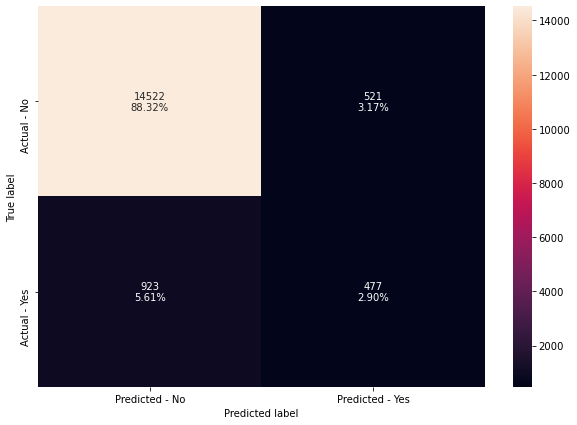

In [59]:
# Calculating different metrics
get_metrics_score(rf_tuned1,X_train_up,X_test,y_train_up,y_test)

# Creating confusion matrix
make_confusion_matrix(rf_tuned1, y_test)

#### RandomizedSearchCV

In [ ]:
%%time 

# Pipeline
pipe = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1))

# Parameter grid

param_grid = {
    "randomforestclassifier__n_estimators": [100,150,250],
    "randomforestclassifier__min_samples_leaf": np.arange(1, 6),
    "randomforestclassifier__max_features": [np.arange(0.3, 0.6, 0.1),'sqrt','log2'],
    "randomforestclassifier__max_samples": np.arange(0.2, 0.6, 0.1),
}


scorer = metrics.make_scorer(metrics.recall_score)

# GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters
grid_cv.fit(X_train_up, y_train_up)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

In [61]:
# New pipeline
rf_tuned2 = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(
        n_estimators=25,
        max_features='sqrt',
        random_state=1,
        max_samples=0.5000000000000001,
        min_samples_leaf=1
    ),
)

# Fit the model
rf_tuned2.fit(X_train_up, y_train_up)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_features='sqrt',
                                        max_samples=0.5000000000000001,
                                        n_estimators=25, random_state=1))])

Accuracy on training set :  0.9839302504487563
Accuracy on test set :  0.9121814753998662
Recall on training set :  0.9746701997321708
Recall on test set :  0.3407142857142857
Precision on training set :  0.9930618050918802
Precision on test set :  0.4779559118236473


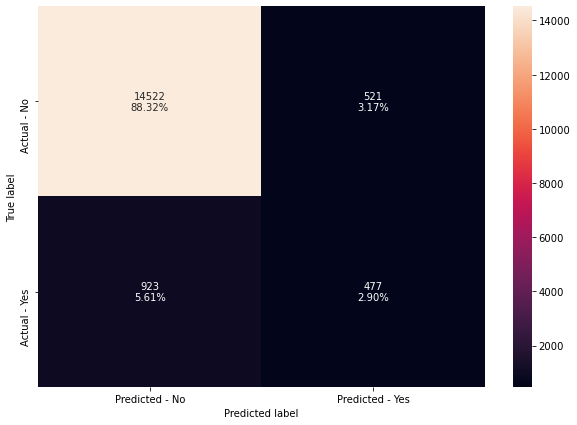

In [62]:
# Metrics
get_metrics_score(rf_tuned2,X_train_up,X_test,y_train_up,y_test)

# Confusion matrix
make_confusion_matrix(rf_tuned2, y_test)

- The Random Forest GridSearch Cross Validation and RandomSearch failed to fit the model during the creation of the pipeline. 
- RF is overfitting the data.
- The new pipeline with Random Search CV gave results fairly quick. 
- For both the training and the test set the model gave a generalized performance.

### AdaBoost for Hyperparameter Tuning 

#### GridSearchCV

In [ ]:
%%time 

# Pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}


scorer = metrics.make_scorer(metrics.recall_score)

# GridSearch Cross Validation
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train_up, y_train_up)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

In [ ]:
# New pipeline
abc_tuned1 = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
        n_estimators=100,
        learning_rate=0.2,
        random_state=1,
    ),
)

# Fit the model
abc_tuned1.fit(X_train_up, y_train_up)

In [ ]:
# Metrics
get_metrics_score(abc_tuned1,X_train,X_test,y_train,y_test)

# Confusion matrix
make_confusion_matrix(abc_tuned1, y_test)

#### Randomized Search Cross Validation

In [ ]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_up,y_train_up)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# New pipeline
abc_tuned2 = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
        n_estimators=50,
        learning_rate=1,
        random_state=1,
    ),
)

# Fit the model
abc_tuned2.fit(X_train_up, y_train_up)

In [ ]:
# Metrics
get_metrics_score(abc_tuned2,X_train_up,X_test,y_train_up,y_test)

# Confusion matrix
make_confusion_matrix(abc_tuned1, y_test)

### Hyperparameter tuning GradientBoosting

#### GridSearchCV

In [63]:
%%time 

# Pipeline
pipe = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1))

# Parameter grid
param_grid = {
    "gradientboostingclassifier__init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "gradientboostingclassifier__n_estimators": np.arange(75,150,25),
    "gradientboostingclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "gradientboostingclassifier__subsample":[0.5,0.7,1],
    "gradientboostingclassifier__max_features":[0.5,0.7,1],
}


scorer = metrics.make_scorer(metrics.recall_score)

# GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters
grid_cv.fit(X_train_up, y_train_up)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'gradientboostingclassifier__init': DecisionTreeClassifier(random_state=1), 'gradientboostingclassifier__learning_rate': 1, 'gradientboostingclassifier__max_features': 0.5, 'gradientboostingclassifier__n_estimators': 125, 'gradientboostingclassifier__subsample': 1} 
Score: 0.9262013728305222
Wall time: 54min 40s


In [64]:
# New pipeline
gbc_tuned1 = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(
        #init=AdaBoostClassifier(random_state=1),
        init=GradientBoostingClassifier(random_state=1),
        learning_rate=0.2,
        max_features=0.7,
        n_estimators=125,
        subsample=1,
        random_state=1,
    ),
)

# Fit the model
gbc_tuned1.fit(X_train_up, y_train_up)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(init=GradientBoostingClassifier(random_state=1),
                                            learning_rate=0.2, max_features=0.7,
                                            n_estimators=125, random_state=1,
                                            subsample=1))])

Accuracy on training set :  0.9335413283186598
Accuracy on test set :  0.9199659429544487
Recall on training set :  0.8950337635695359
Recall on test set :  0.38857142857142857
Precision on training set :  0.9697166141878125
Precision on test set :  0.5418326693227091


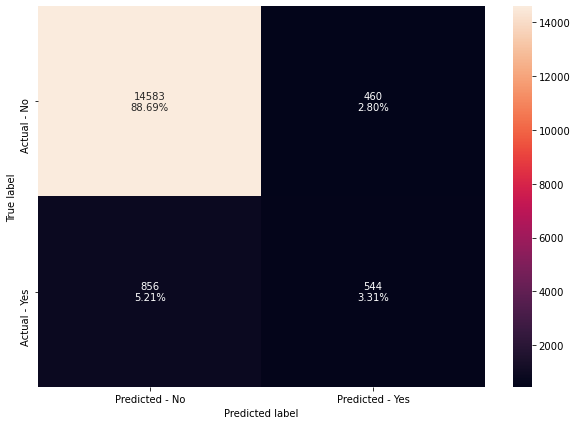

In [65]:
# Calculating different metrics
get_metrics_score(gbc_tuned1,X_train_up,X_test,y_train_up,y_test)

# Creating confusion matrix
make_confusion_matrix(gbc_tuned1, y_test)

#### Gradient Boosting with RandomizedSearchCV

In [66]:
%%time 

# Pipeline
pipe=make_pipeline(StandardScaler(),GradientBoostingClassifier(random_state=1))

#Paramete
param_grid = {
    "gradientboostingclassifier__init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "gradientboostingclassifier__n_estimators": np.arange(75,150,25),
    "gradientboostingclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "gradientboostingclassifier__subsample":[0.5,0.7,1],
    "gradientboostingclassifier__max_features":[0.5,0.7,1],
}


scorer = metrics.make_scorer(metrics.recall_score)

# RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=100, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters
randomized_cv.fit(X_train_up,y_train_up)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'gradientboostingclassifier__subsample': 1, 'gradientboostingclassifier__n_estimators': 100, 'gradientboostingclassifier__max_features': 0.7, 'gradientboostingclassifier__learning_rate': 1, 'gradientboostingclassifier__init': DecisionTreeClassifier(random_state=1)} with CV score=0.925859468134721:
Wall time: 20min 47s


In [67]:
# New pipeline
gbc_tuned2 = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(
        init=AdaBoostClassifier(random_state=1),
        learning_rate=1,
        max_features=0.7,
        n_estimators=75,
        subsample=0.7,
        random_state=1,
    ),
)

# Fit the model
gbc_tuned2.fit(X_train_up, y_train_up)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                            learning_rate=1, max_features=0.7,
                                            n_estimators=75, random_state=1,
                                            subsample=0.7))])

Accuracy on training set :  0.930744167861332
Accuracy on test set :  0.9289667335644347
Recall on training set :  0.3733170134638923
Recall on test set :  0.36857142857142855
Precision on training set :  0.6670311645708037
Precision on test set :  0.645


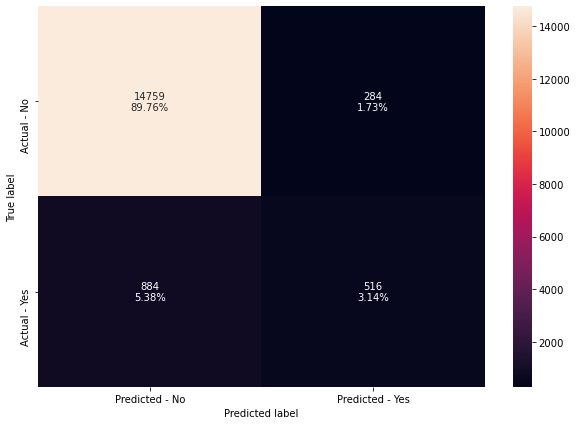

In [68]:
# Calculating different metrics
get_metrics_score(gbc_tuned2,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(gbc_tuned2, y_test)

### Hyperparameter tuning XGBoost

#### XGBoost GridSearchCV

In [69]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(), XGBClassifier(random_state=1,eval_metric='logloss'))

#Parameter grid to pass in GridSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05], 'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

#Fitting parameters in GridSeachCV
grid_cv.fit(X_train_up,y_train_up)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Best parameters are {'xgbclassifier__gamma': 3, 'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__n_estimators': 50, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__subsample': 0.7} with CV score=0.9922781753555368:
Wall time: 11h 7min 24s


In [78]:
# Creating new pipeline with best parameters
xgb_tuned1 = make_pipeline(
    StandardScaler(),
    XGBClassifier(
        random_state=1,
        n_estimators=50,
        scale_pos_weight=10,
        subsample=0.7,
        learning_rate=0.01,
        gamma=3,
        eval_metric='logloss',
    ),
)

# Fit the model on training data
xgb_tuned1.fit(X_train_up, y_train_up)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=3, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.01,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=50,
                               n_jobs=4, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=10,
                               subsample=0.7, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.6050802062854375
Accuracy on test set :  0.2762269658821383
Recall on training set :  0.9959540701484457
Recall on test set :  0.9614285714285714
Precision on training set :  0.558975917101097
Precision on test set :  0.10202380050026529


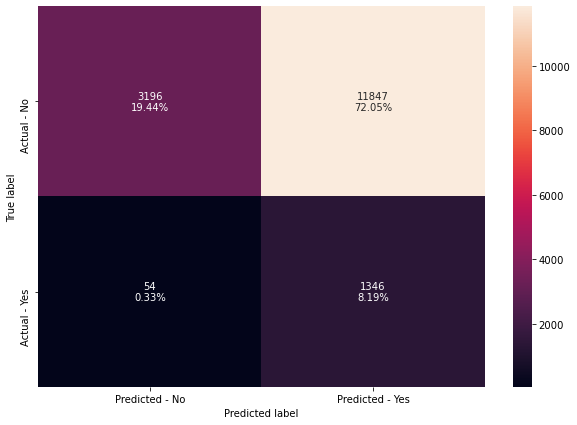

In [79]:
# Calculating different metrics
get_metrics_score(xgb_tuned1,X_train_up,X_test,y_train_up,y_test)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned1, y_test)

#### XGBooost RandomizedSearchCV

In [75]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(),XGBClassifier(random_state=1,eval_metric='logloss'))

#Parameter grid to pass in RandomSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05], 'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=100, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_up,y_train_up)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'xgbclassifier__subsample': 0.9, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__n_estimators': 150, 'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__gamma': 3} with CV score=0.9910814236815092:
Wall time: 51min 20s
Compiler : 127 ms


In [80]:
# New pipeline with best parameters
xgb_tuned2 = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "XGradientBoost",
            XGBClassifier(
                random_state=1,
                n_estimators=150,
                scale_pos_weight=10,
                learning_rate=0.01,
                gamma=3,
                subsample=0.9,
                eval_metric='logloss',
            ),
        ),
    ]
)
# Fit the model on training data
xgb_tuned2.fit(X_train_up, y_train_up)

Pipeline(steps=[('scaler', StandardScaler()),
                ('XGradientBoost',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=3, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.01,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=150,
                               n_jobs=4, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=10,
                               subsample=0.9, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.6204518904749694
Accuracy on test set :  0.30249954387885425
Recall on training set :  0.9956121605835256
Recall on test set :  0.9478571428571428
Precision on training set :  0.5688170467679184
Precision on test set :  0.10429930047944667


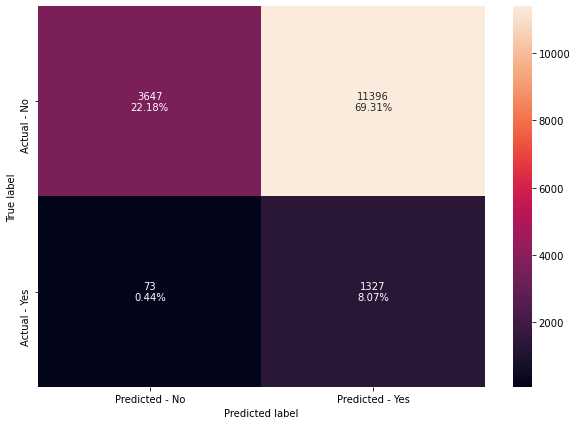

In [81]:
# Calculating different metrics
get_metrics_score(xgb_tuned2,X_train_up,X_test,y_train_up,y_test)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned2, y_test)

* From the XGBoost models, the Grid search model produced the highest Recall Score of 96% but it took a lot of time to complete running the model. XGB Randomized had a smaller Recall score of 95%, but it completed in 20% of time in comparison to Gridsearch. 
* Grid Search has a better score but if there is not much time to run the models, Randomized gives a very good score.

### Model comparison with GridSearchCV and RandomizedCVfor: 
- Decision Tree
- Random Forest
- Bagging Classifier
- Gradient Classifier
- XGBoost

In [90]:
# Defining list of models

models = [dtree_tuned1, dtree_tuned2, bagg_tuned1, bagg_tuned2, rf_tuned1, rf_tuned2, gbc_tuned1, gbc_tuned2, xgb_tuned1, xgb_tuned2]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:

    j = get_metrics_score(model,X_train_up,X_test,y_train_up,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [92]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "Decision tree tuned with GridSearchCV",
            "Decision tree tuned with RandomizedSearchCV",
            "Bagging Classifier tuned with GridSeachCV",
            "Bagging Classifier tuned with RandomizedSearchCV",
            "Random Forest tuned with GridSeachCV",
            "Random Forest tuned with RandomizedSearchCV",
            "Gradient Boost Classifier tuned with GridSeachCV",
            "Gradient Boost tuned with RandomizedSearchCV",
            "XGBoost tuned with GridSearchCV",
            "XGBoost tuned with RandomizedSearchCV",
        ],
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
    }
)

# Sorting models in decreasing order of test recall
comparison_frame.sort_values(by="Test_Recall", ascending=True)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
2,Bagging Classifier tuned with GridSeachCV,0.989,0.924,0.980,0.303,0.998,0.601
0,Decision tree tuned with GridSearchCV,0.788,0.873,0.649,0.310,0.898,0.280
1,Decision tree tuned with RandomizedSearchCV,0.786,0.877,0.642,0.321,0.903,0.297
4,Random Forest tuned with GridSeachCV,0.984,0.912,0.975,0.341,0.993,0.478
5,Random Forest tuned with RandomizedSearchCV,0.984,0.912,0.975,0.341,0.993,0.478
7,Gradient Boost tuned with RandomizedSearchCV,0.950,0.929,0.918,0.369,0.981,0.645
6,Gradient Boost Classifier tuned with GridSeachCV,0.934,0.920,0.895,0.389,0.970,0.542
9,XGBoost tuned with RandomizedSearchCV,0.620,0.302,0.996,0.948,0.569,0.104
8,XGBoost tuned with GridSearchCV,0.605,0.276,0.996,0.961,0.559,0.102
3,Bagging Classifier tuned with RandomizedSearchCV,0.500,0.085,1.000,1.000,0.500,0.085


### The Test Recall scores are as follows:
- Decision Tree GridSearchCV: 31%
- Decision Tree RandomSearchCV: 32%
- Bagging GridSearchCV: 30%
- Bagging RandomSearchCV: 100% (overfit)
- Random Forest GridSearchCV: 34%
- Random Forest RandomSearchCV: 34%
- Gradient Boost GridSearchCV: 39%
- Gradient Boost RandomizedSearchCV: 37%
- XGBoost GridSearchCV: 96%
- XGBoost RandomSearchCV: 95%


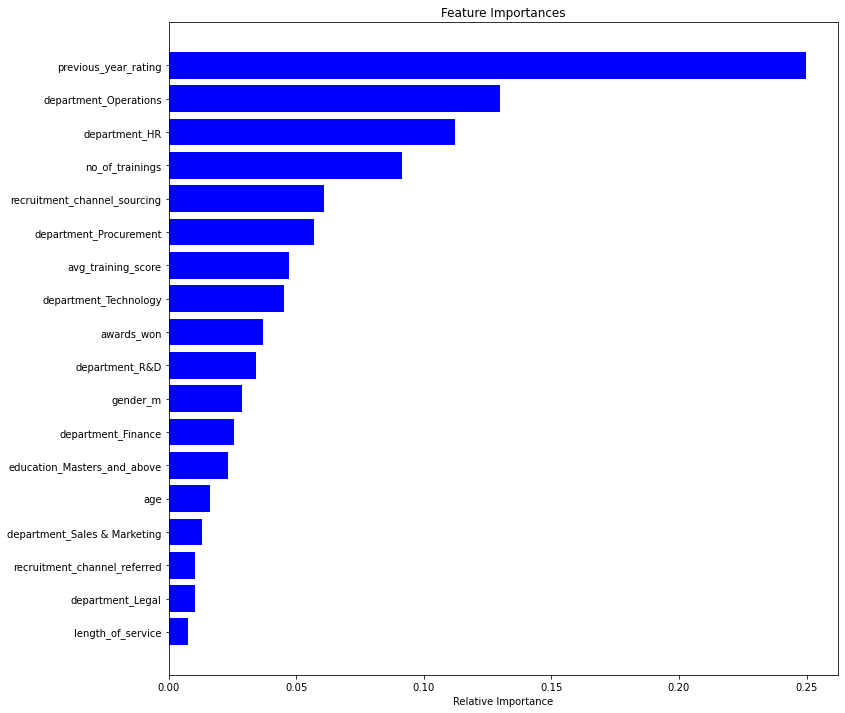

In [93]:
feature_names = X_train.columns
importances = xgb_tuned1[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="blue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Business Recommendations
* A predictive model has been built:
- The Human Resources team can deploy the model to identify potential canditates for promotion 
- Potential canditates for promotion have a higher probability of being identified with more accuracy.
 
* The factors that can determine if a candidate is eligible for promotion or not are: 

    * Previous_year_rating: - Employees with higher scores from last year on the scale from 1 to 5, have a higher chance of getting a promotion.
    
    * Department: The Operations department and HR departments have a high feature importance. Our team can do a deeper dive into the data to find why these groups have been receiving promotions and maybe replicate some of the processes applied in these departments to other departments.
    
    * The Technlogy department is a field identified with higher chance of getting promoted based on percentage of employees in that department. Probably due to the employees having to be updating their knowledge base and education more constantly. The sales department has a higher amount of promotions in comparison to the other department, but it is also the department with the most employees.

    * Employees that have a Master's degree or above have a higher probability to receive a promotion over the ones that have a Bachelor's or are below secondary.

    * Before running the models our data showed that more than half of the employees where contacted by an unidentified recruitment channel. The unidentified recruitment channels are not being measured accurately and the HR team is probably missing opportunities to identify candidates for promotion. 
    * After running the models, sourcing is has the highest recall scores as a method for contacting potential candidates for promotion.

    * Employees that were recruited by sourcing or referred for a promotion have a higher chance of receiving a promotion.
    * The highest percentage of outliers is in the Length of Service and Number of Trainings received by employees. This would be complicated metrics to measure. By identifying specific trainings or training areas that could help with identifying if a candidate is ready for a promotion, the HR team can improve employee performance and rating scores. 
    * Outliers were not removed. These outliers can provide good real data (trainings, ratings, and length of service) and we would want our model to learn with the most real data about any underlying patterns.
    * Dropping outlier values from the Length of service dimension, could fall under gray area of discrimination by age, so we don't want to remove a group from our data, even if they are outliers.

    
- XGBoost with Grid Search obtained the highest Recall Score from all the models.
- The Test Recall scores are as follows:
    - Decision Tree GridSearchCV: 31%
    - Decision Tree RandomSearchCV: 32%
    - Bagging GridSearchCV: 30%
    - Bagging RandomSearchCV: 100% (overfit)
    - Random Forest GridSearchCV: 34%
    - Random Forest RandomSearchCV: 34%
    - XGBoost GridSearchCV: 96%
    - XGBoost RandomSearchCV: 95%